In [ ]:
# prompt: # je veux appliquer l algorithme kmeans sur une dataset apres avoir pretraiter la dataset et appliquer le pca et appliquer un process de data cleaning qui gere les missing values on les remplissant et qui supprime les lgnes dupliqyuer ainsi ll gere les categorical columns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Charger votre dataset
data = pd.read_csv("/content/customer_segmentation.csv")  # Remplacez "votre_dataset.csv" par le nom de votre fichier



In [ ]:
# prompt: donner le shape du data ses  colonnes et leurs types

print("Shape du dataset:", data.shape)
print("\nColonnes et leurs types:")
data.dtypes

Shape du dataset: (2240, 29)

Colonnes et leurs types:


,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# prompt: #coder les colonnes de type object

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



# Identifier les colonnes de type object
object_columns = data.select_dtypes(include=['object']).columns

# Créer un LabelEncoder pour chaque colonne de type object
encoders = {}
for col in object_columns:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

print("Shape du dataset:", data.shape)
print("\nColonnes et leurs types:")
data.dtypes

Shape du dataset: (2240, 29)

Colonnes et leurs types:


,0
ID,int64
Year_Birth,int64
Education,int64
Marital_Status,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,int64
Recency,int64
MntWines,int64


In [ ]:
# Data Cleaning
# 1. Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')  # Vous pouvez choisir une autre stratégie (median, most_frequent)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 2. Suppression des lignes dupliquées
data_cleaned = data_imputed.drop_duplicates()

# 3. Gestion des colonnes catégorielles
# Vous pouvez utiliser une technique d'encodage comme le One-Hot Encoding ou Label Encoding
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
  data_cleaned = pd.get_dummies(data_cleaned, columns=[col], prefix=[col])

# Prétraitement des données
# 1. Séparation des variables indépendantes (X) des variables dépendantes (y)
# Si votre dataset n'a pas de variables dépendantes, vous pouvez sauter cette étape
# X = data_cleaned.drop('variable_dependante', axis=1)
# y = data_cleaned['variable_dependante']





In [ ]:
# prompt: supprimer ces colonnes AcceptedCmp3	int64
# AcceptedCmp4	int64
# AcceptedCmp5	int64
# AcceptedCmp1	int64
# AcceptedCmp2


from sklearn.impute import SimpleImputer



# Supprimer les colonnes spécifiées
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact','Z_Revenue']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')


print("Shape du dataset:", data_cleaned.shape)
print("\nColonnes et leurs types:")
data.dtypes


Shape du dataset: (2240, 22)

Colonnes et leurs types:


,0
ID,int64
Year_Birth,int64
Education,int64
Marital_Status,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,int64
Recency,int64
MntWines,int64


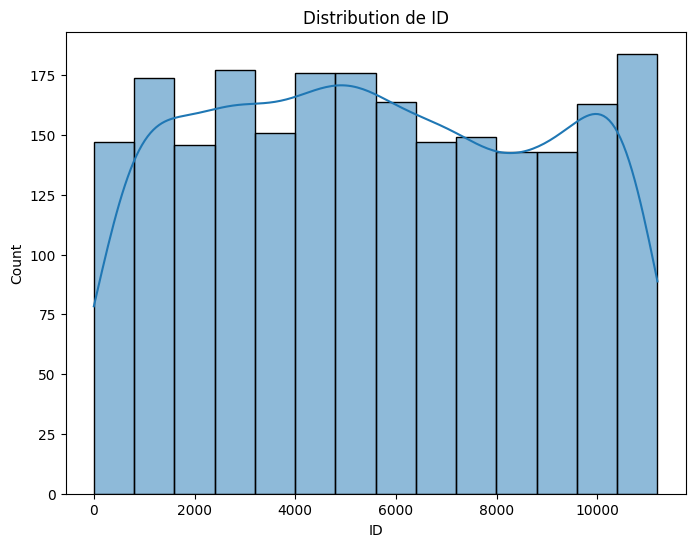

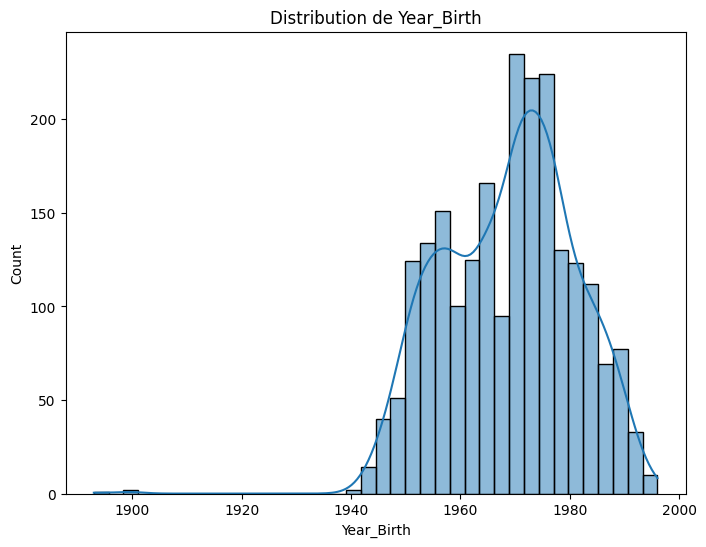

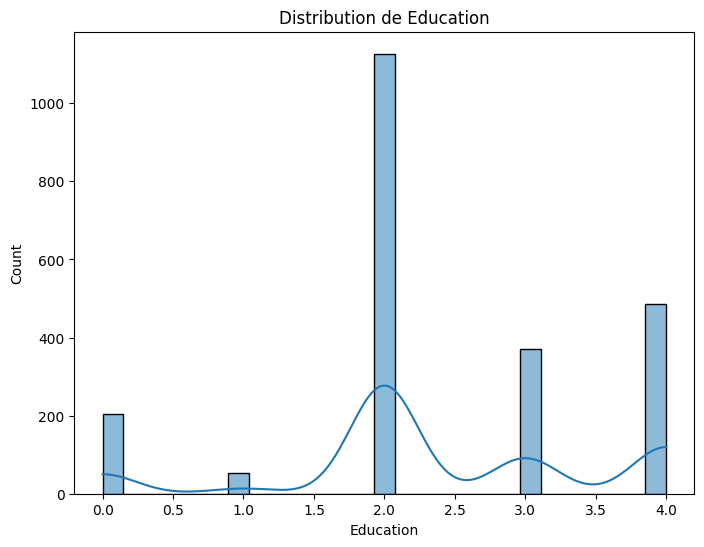

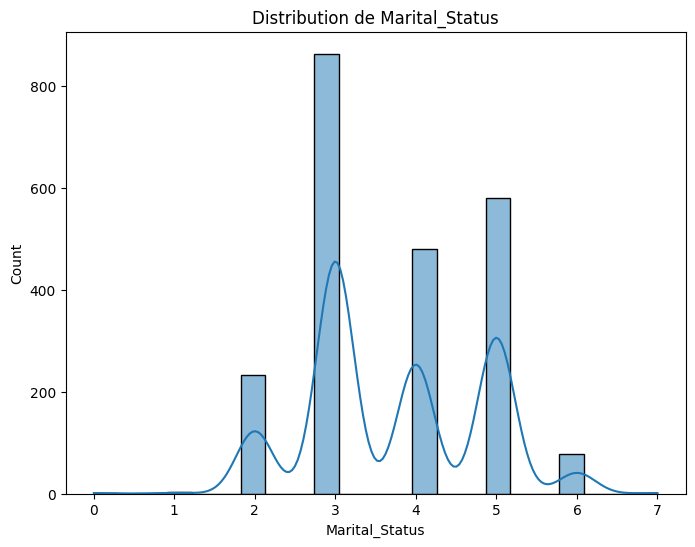

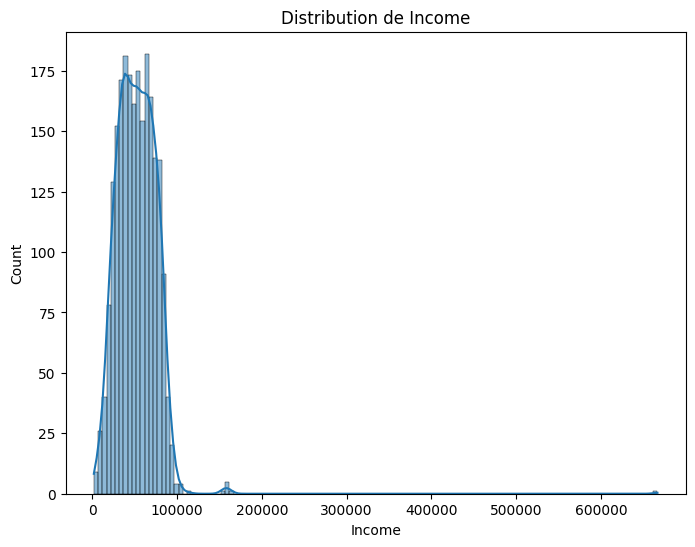

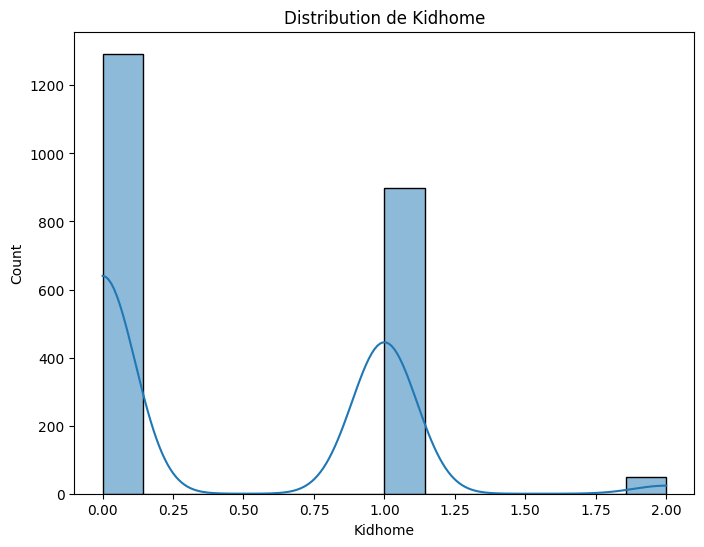

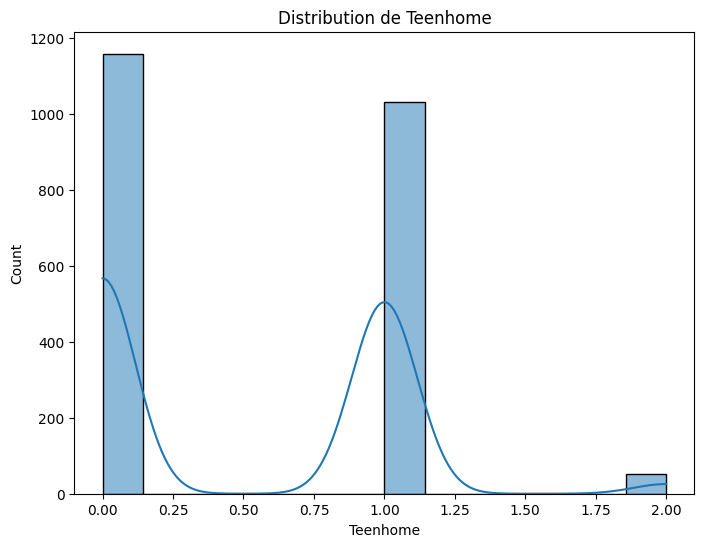

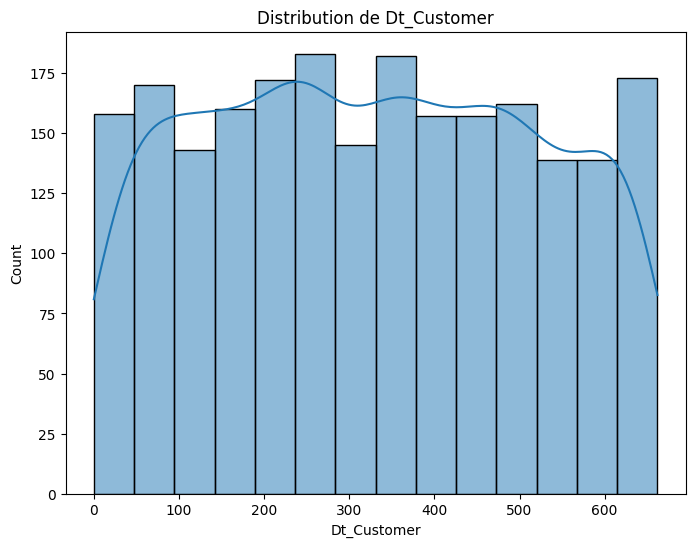

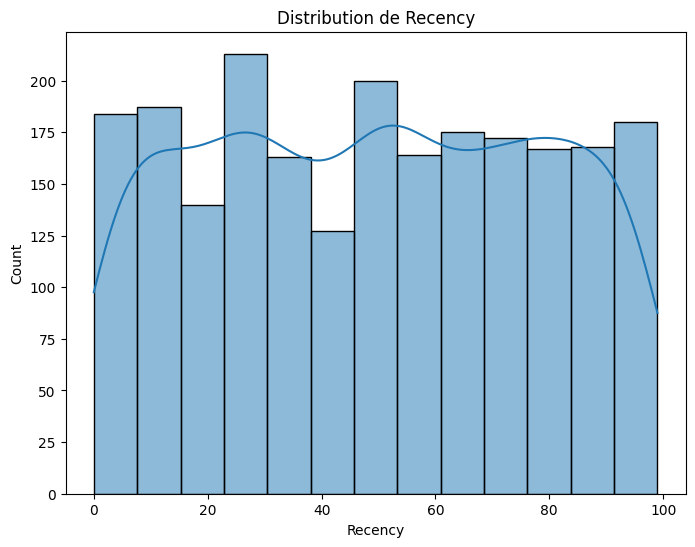

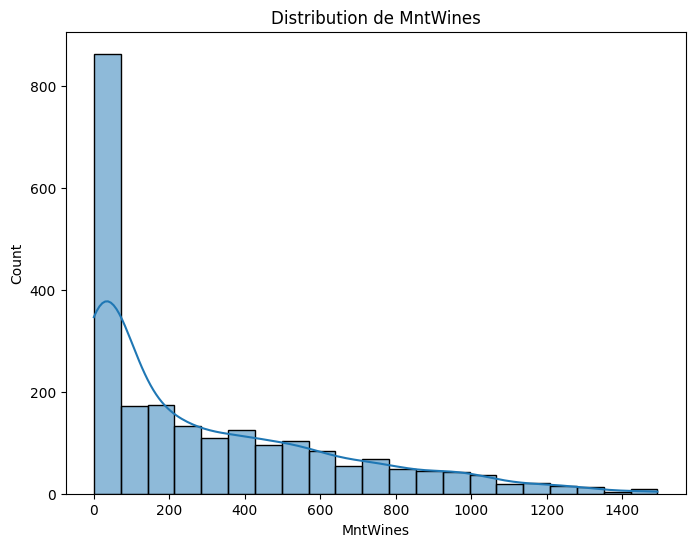

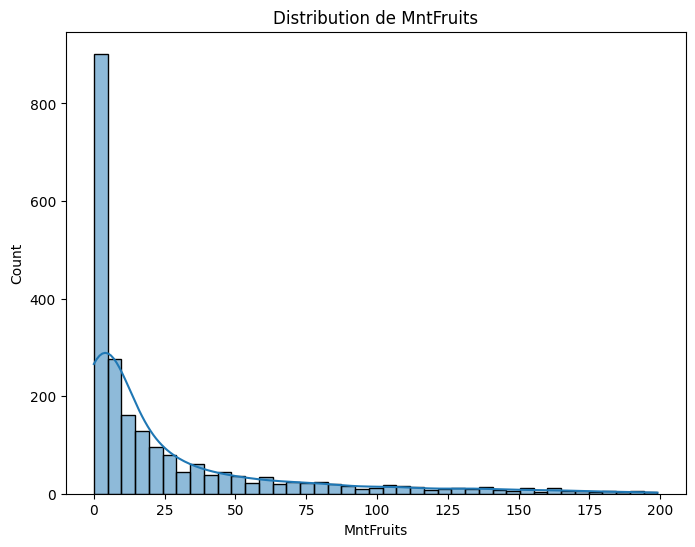

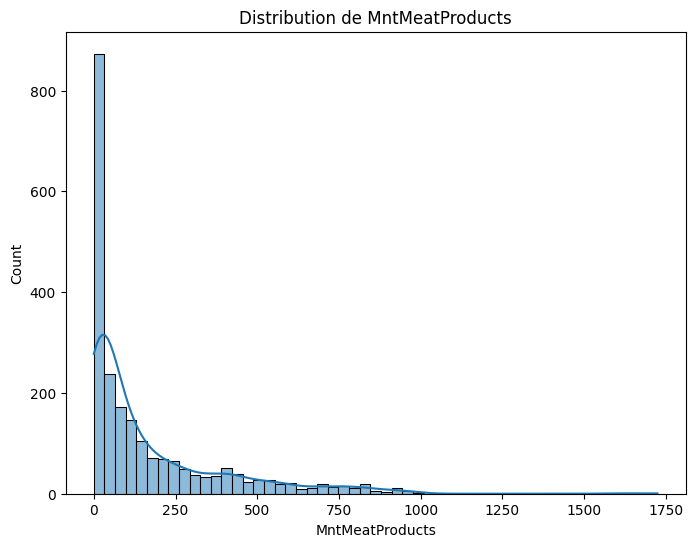

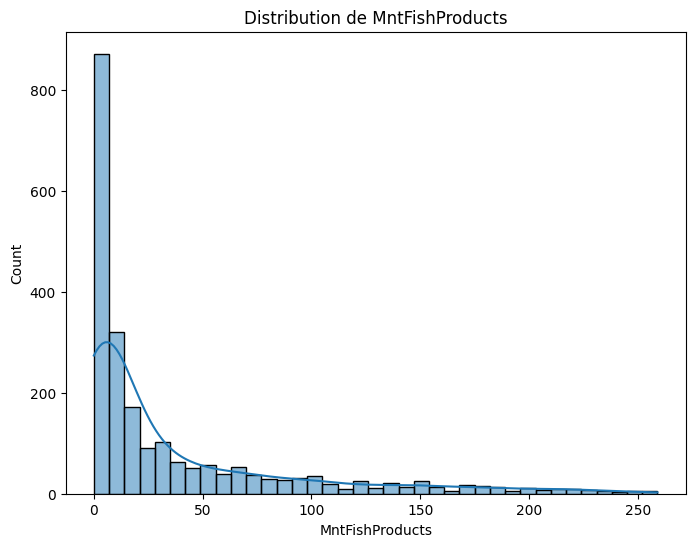

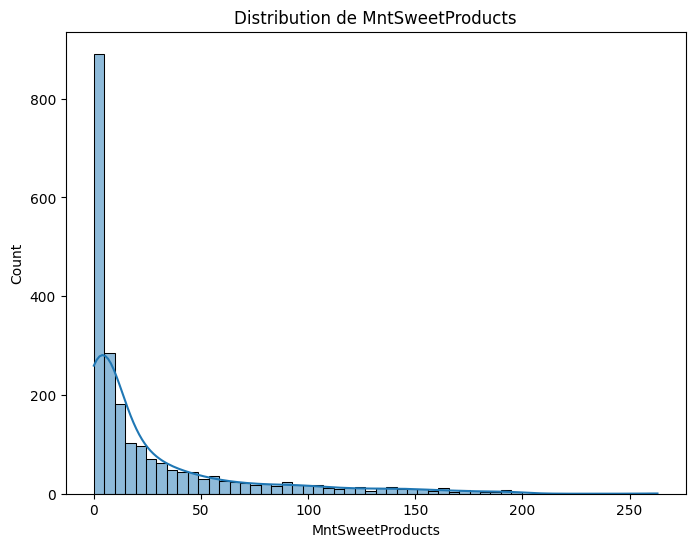

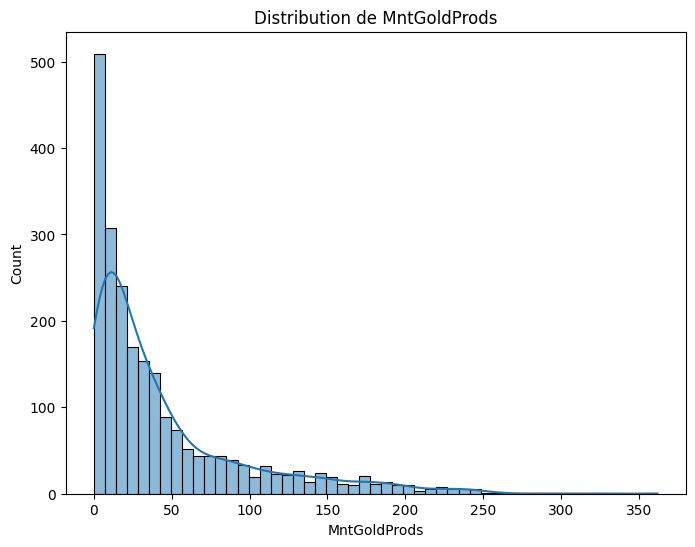

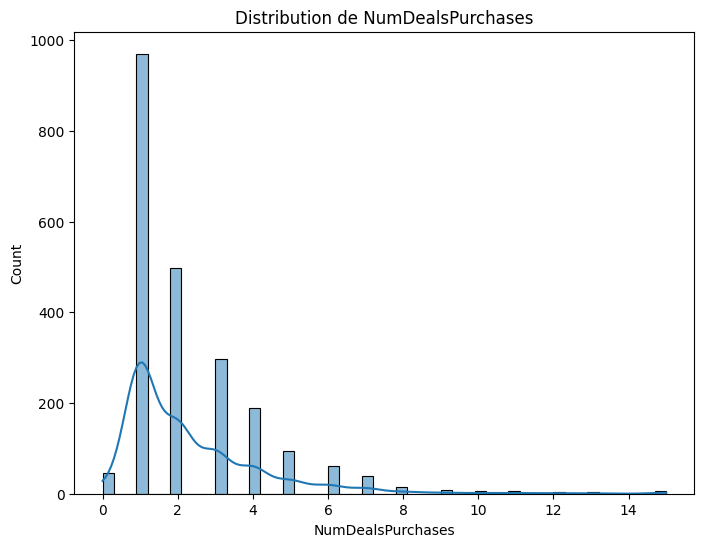

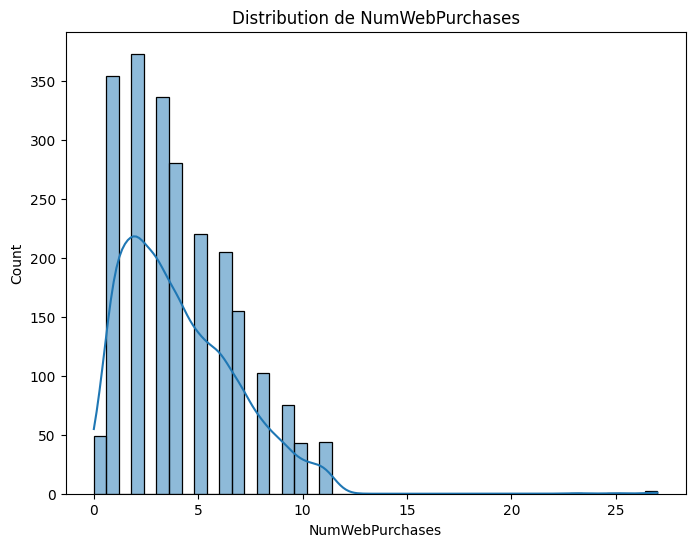

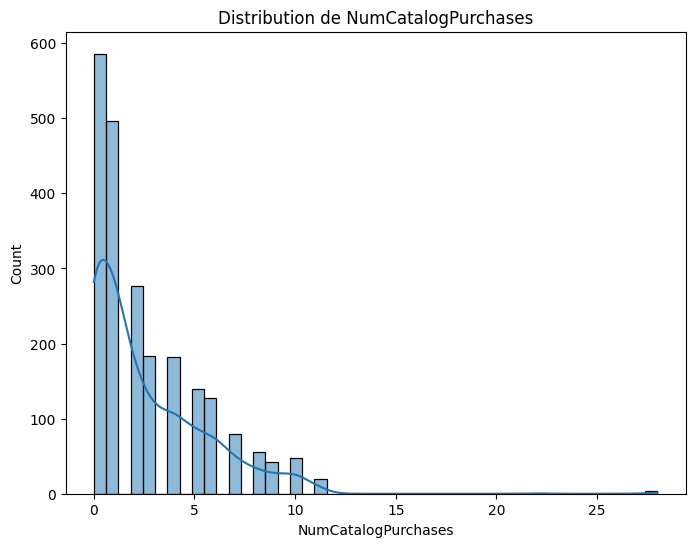

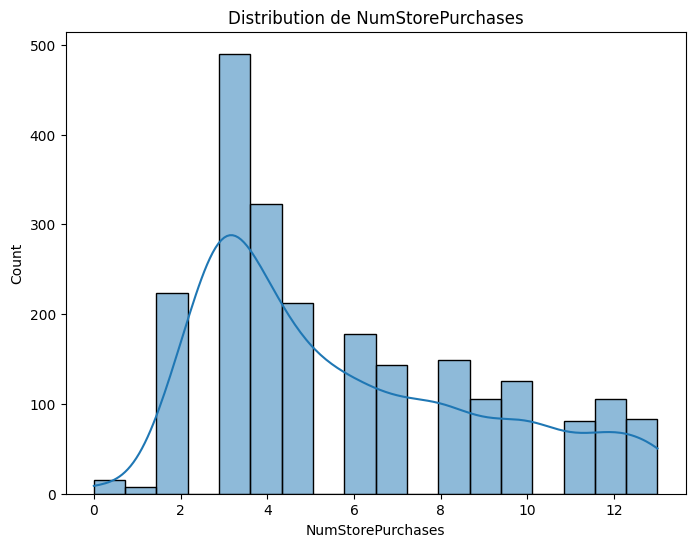

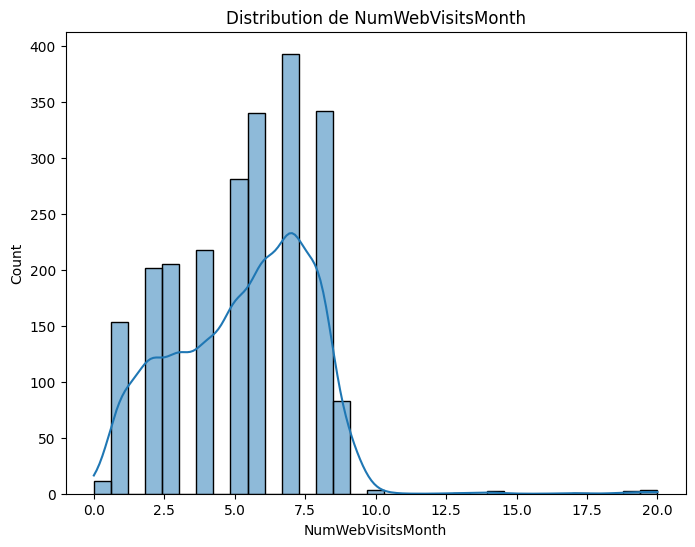

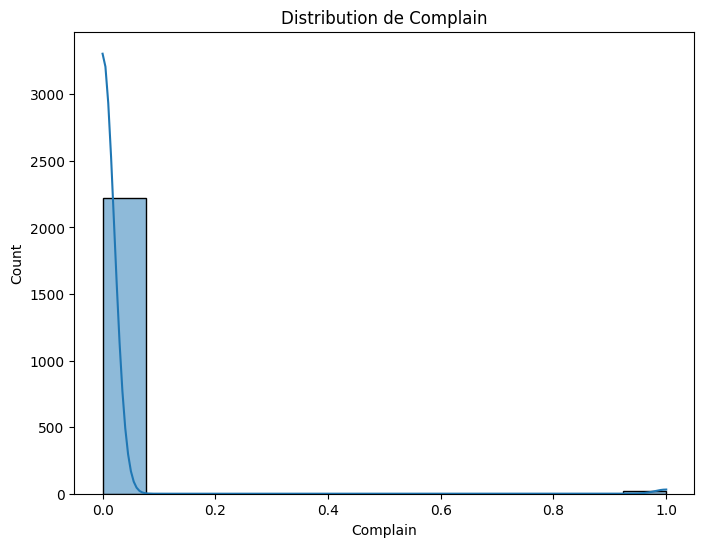

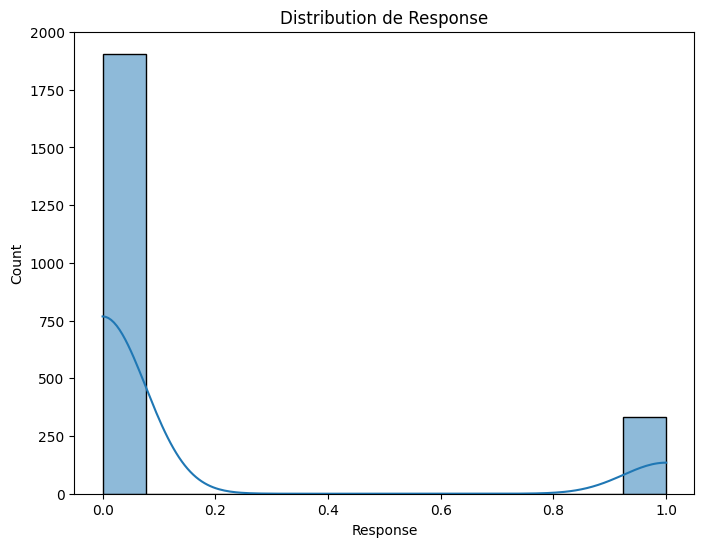

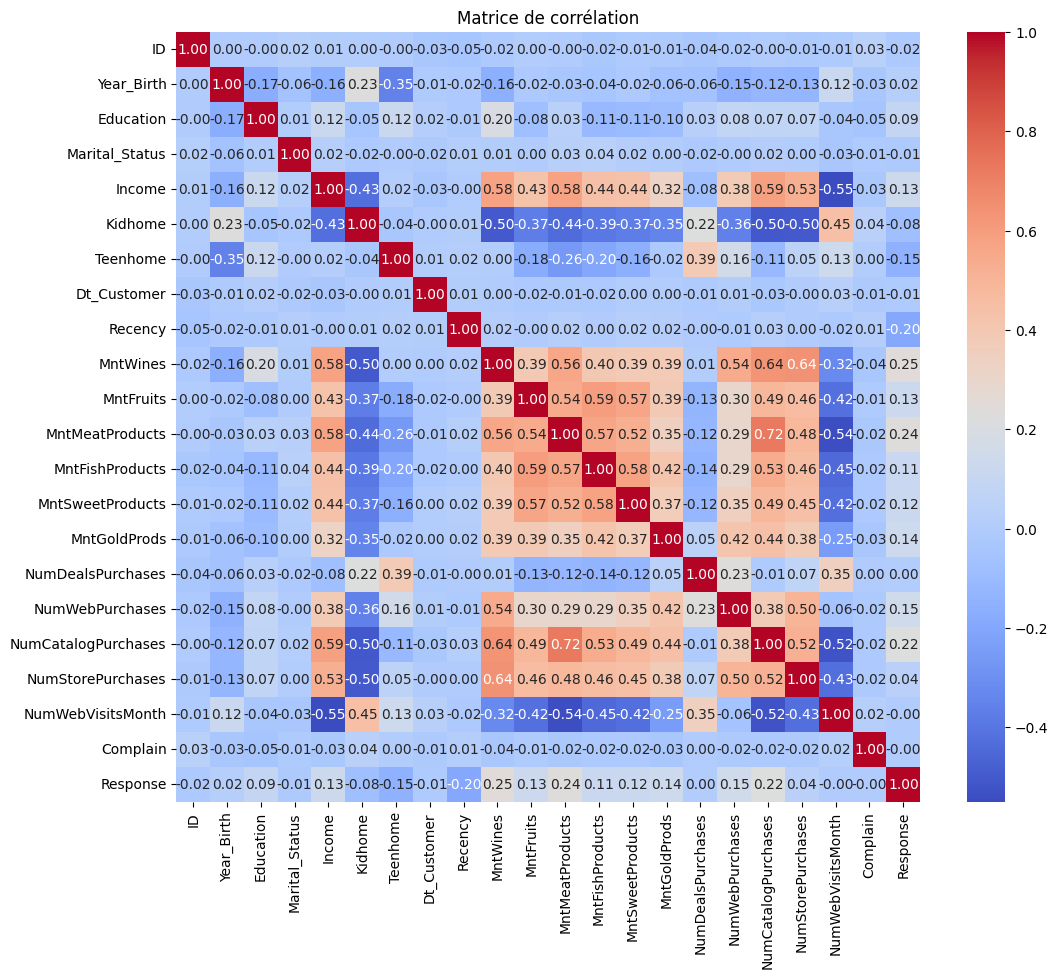

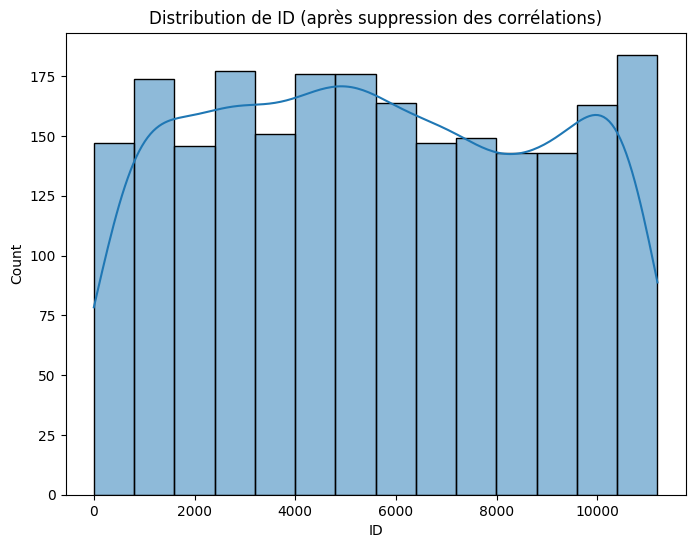

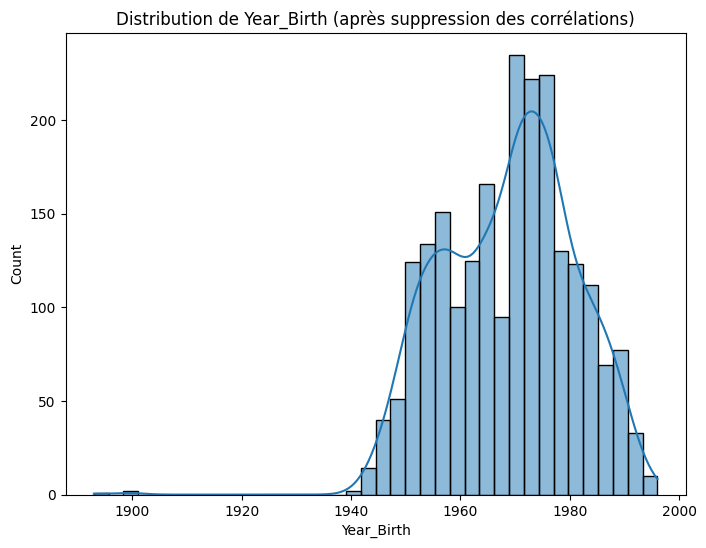

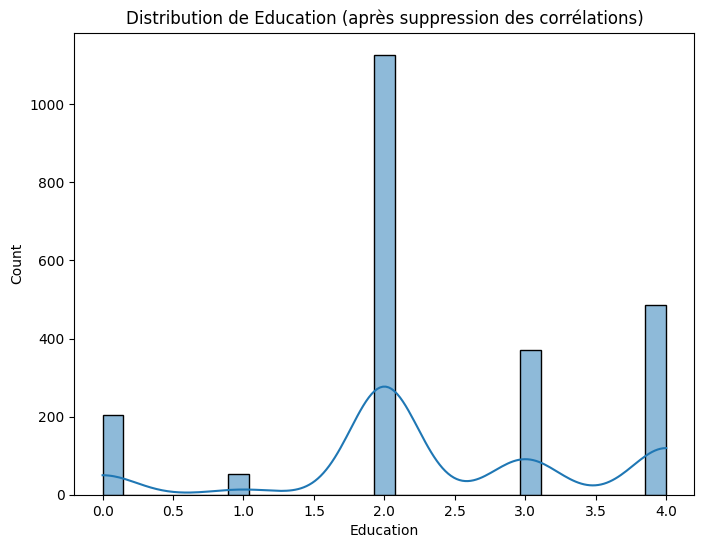

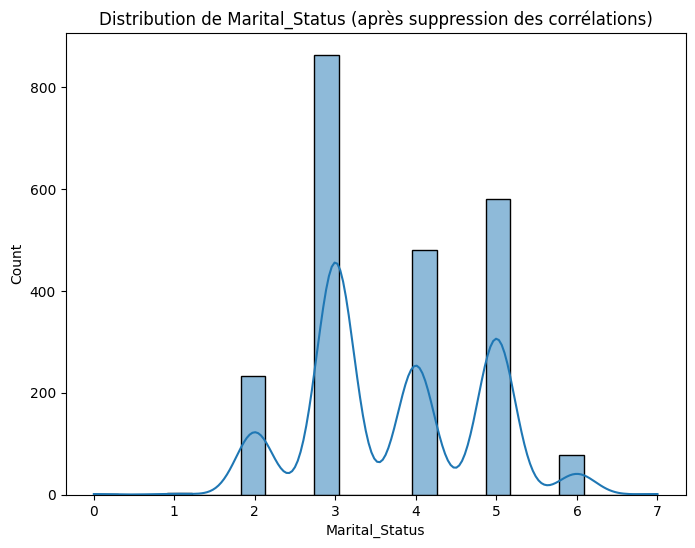

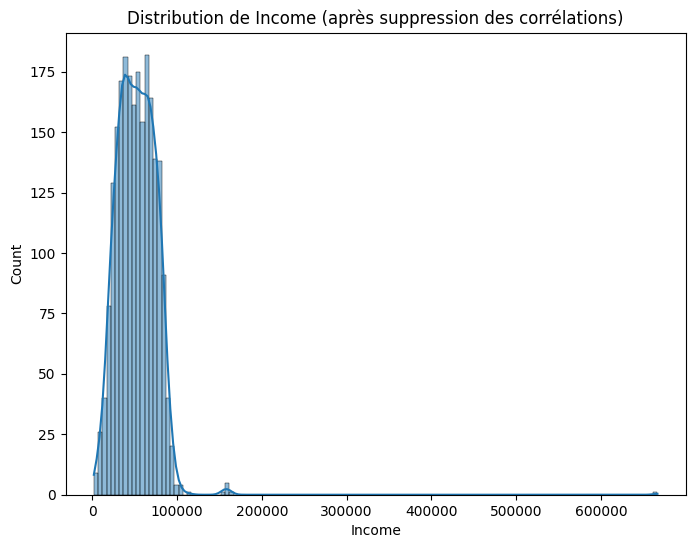

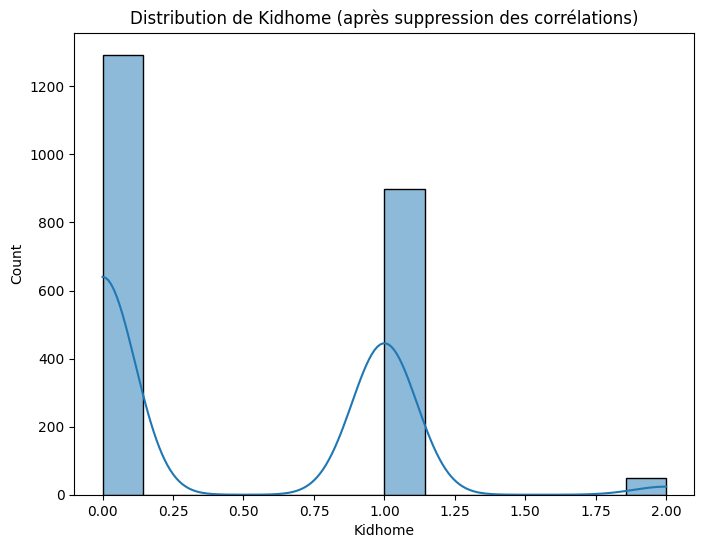

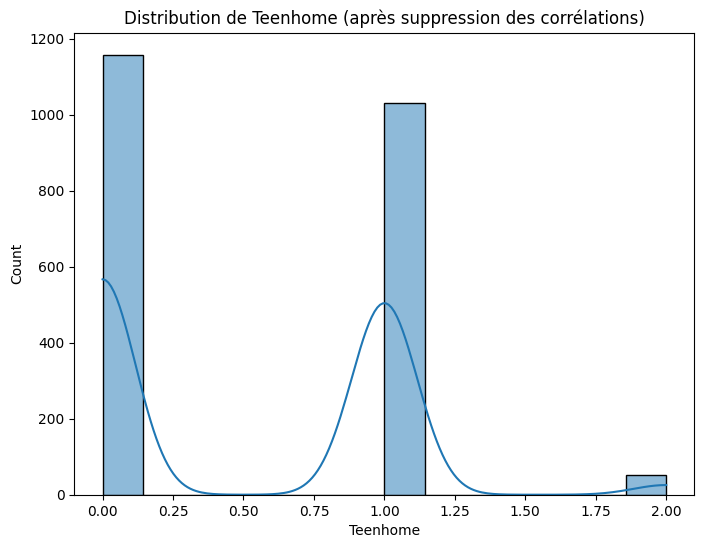

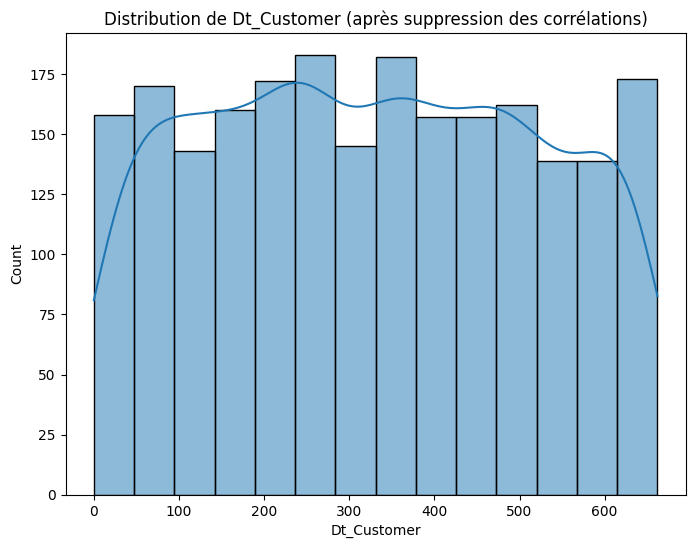

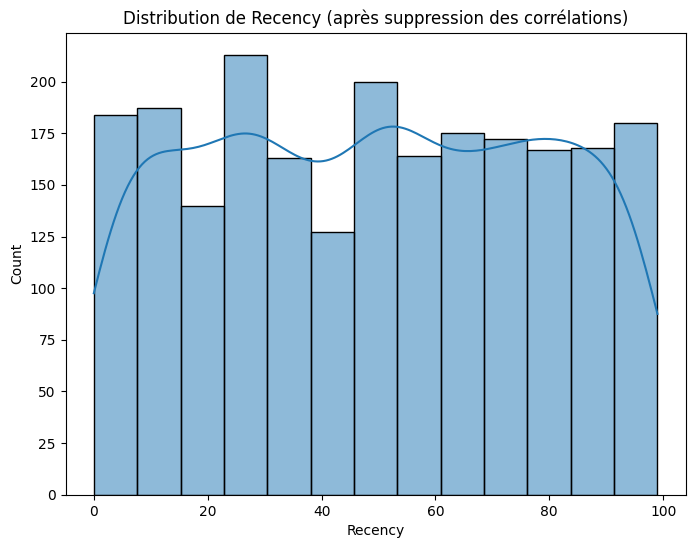

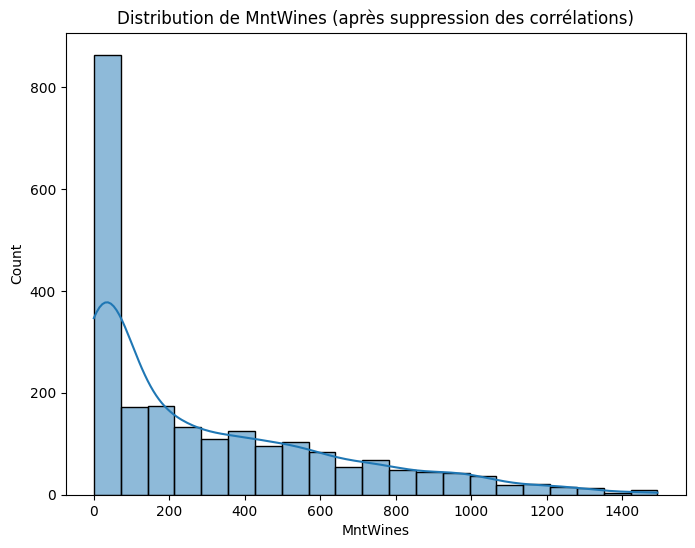

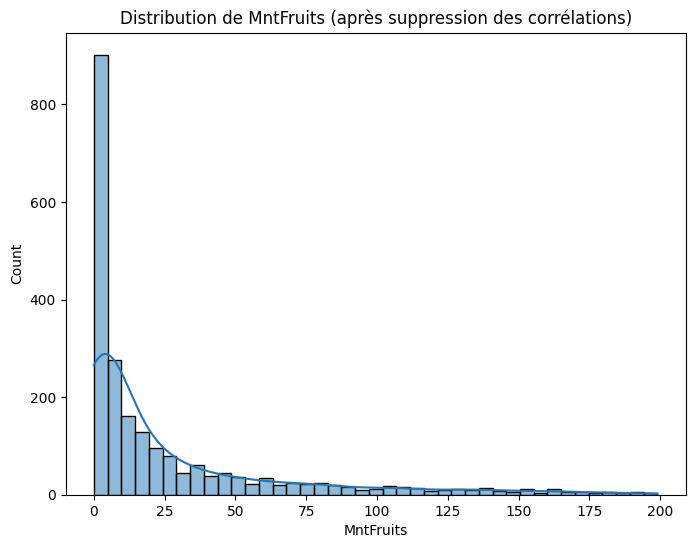

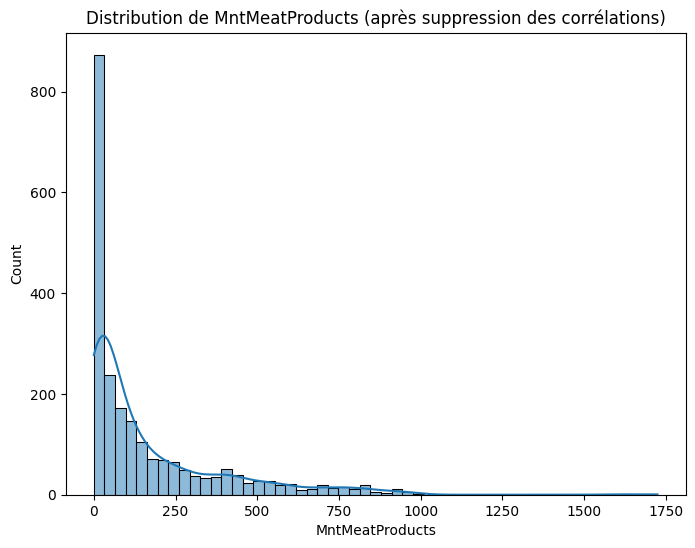

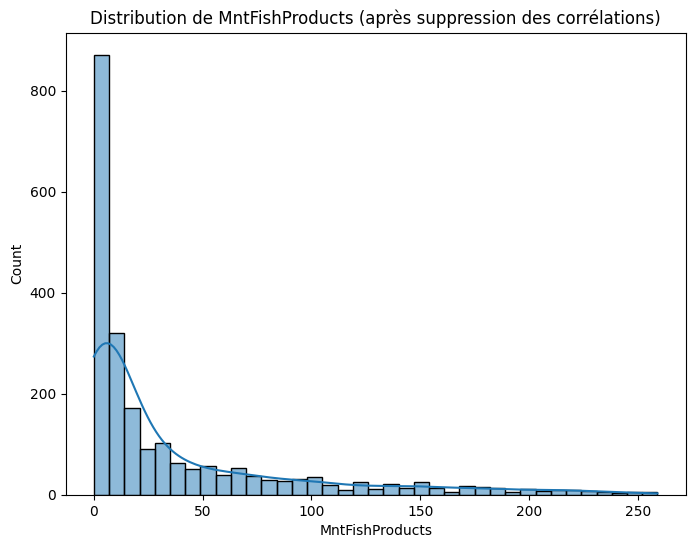

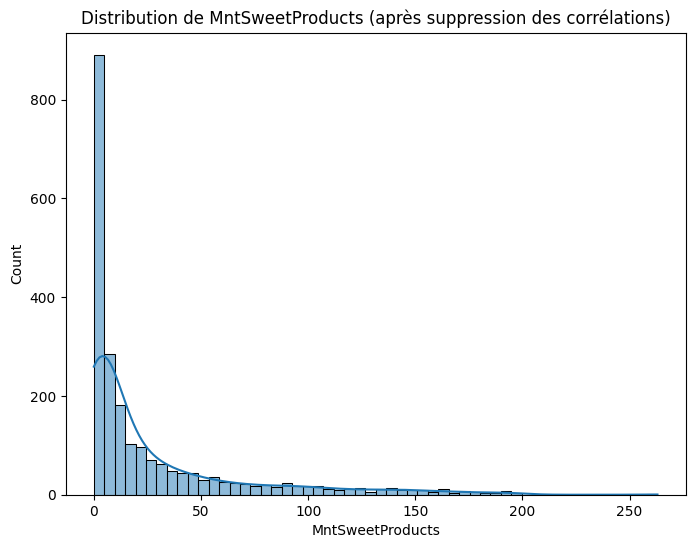

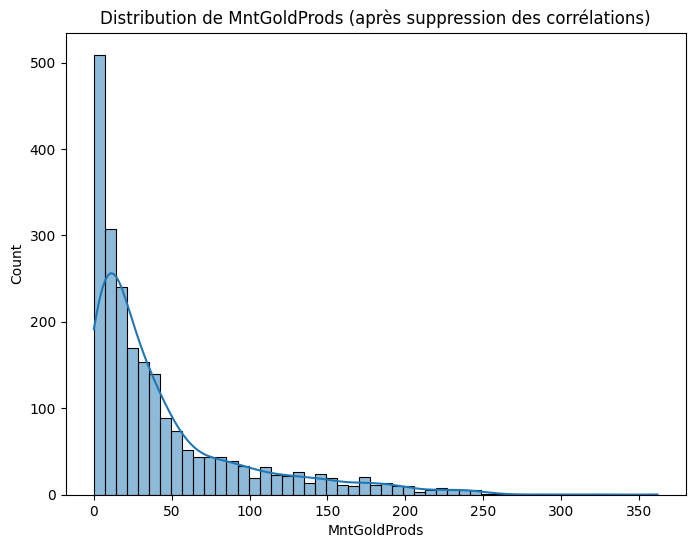

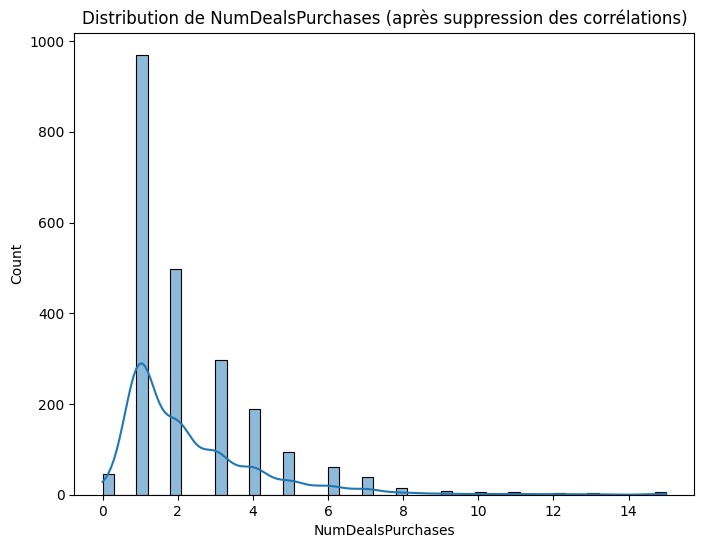

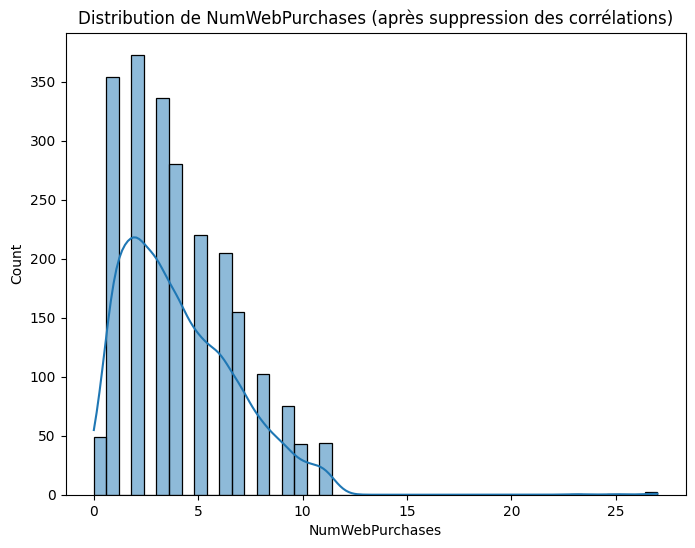

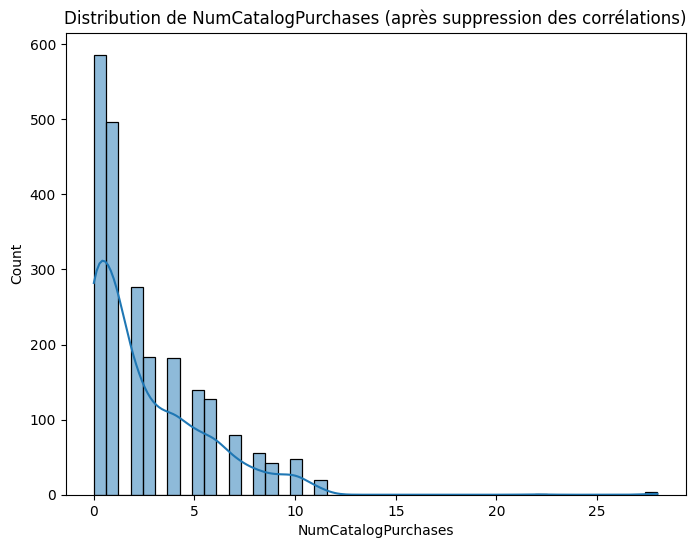

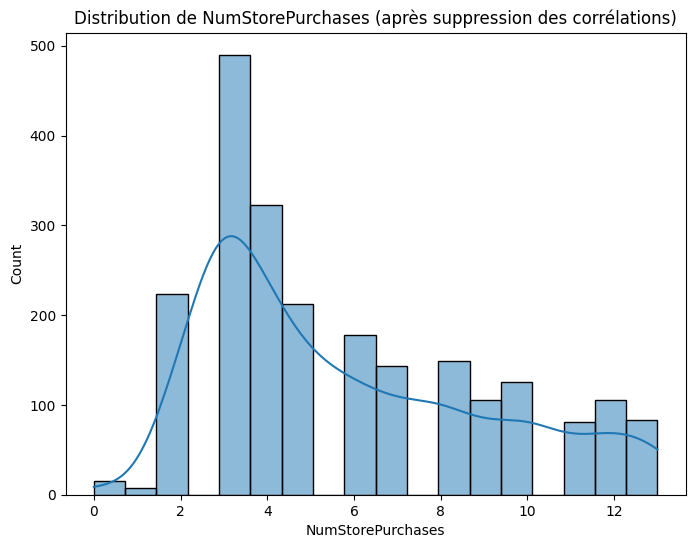

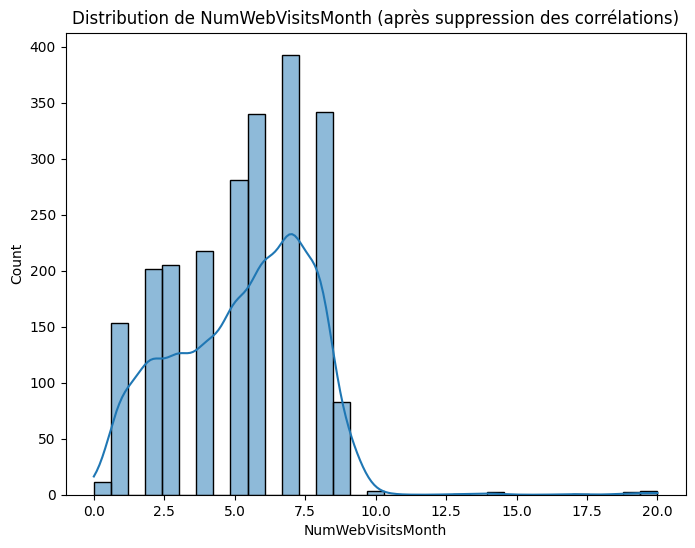

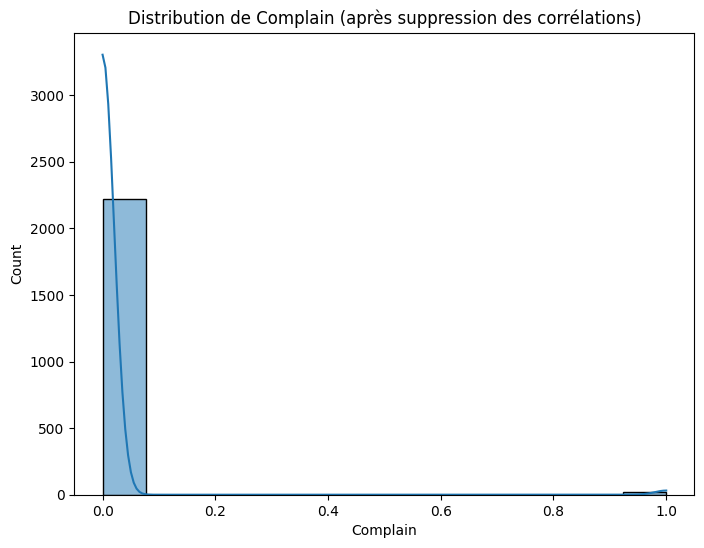

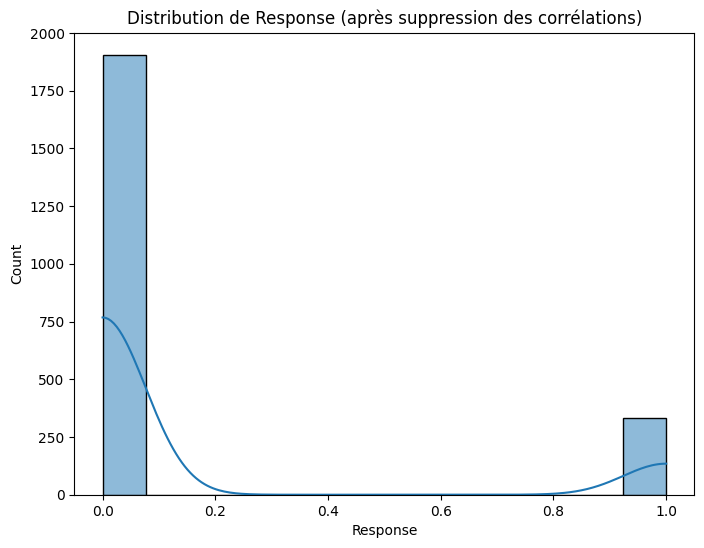

In [ ]:
# prompt: visualizer les destribution des donnes et la correlation entre les features du dataset et les afficher dans des plots bien specifique  et en supprimant les hautes crrelation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



# Visualisation de la distribution des données
for col in data_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data_cleaned[col], kde=True)
  plt.title(f"Distribution de {col}")
  plt.show()


# Calcul de la matrice de corrélation
correlation_matrix = data_cleaned.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Identification des variables fortement corrélées
# Vous pouvez définir un seuil de corrélation (par exemple, 0.8)
high_correlation_threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
      colname_i = correlation_matrix.columns[i]
      colname_j = correlation_matrix.columns[j]
      correlated_features.add(colname_i)
      correlated_features.add(colname_j)

# Suppression des variables fortement corrélées
# Vous pouvez choisir de supprimer une des variables dans chaque paire fortement corrélée
data_cleaned_no_corr = data_cleaned.drop(columns=list(correlated_features))


# Visualisation de la distribution des données après suppression des variables corrélées
for col in data_cleaned_no_corr.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data_cleaned_no_corr[col], kde=True)
  plt.title(f"Distribution de {col} (après suppression des corrélations)")
  plt.show()


# Vous pouvez ensuite utiliser les données nettoyées et sans corrélations élevées
# pour vos analyses de clusters ou d'autres analyses

Pourcentage de variance expliquée : 
[0.27758464 0.09129938]
Composantes principales : 
[[-0.0048041  -0.06435745  0.01910486  0.01145207  0.3009628  -0.26926352
  -0.05094572 -0.00733625  0.0023371   0.30590744  0.28477743  0.32326429
   0.29391772  0.28345965  0.23440036 -0.05048648  0.22264347  0.33096872
   0.29979199 -0.26138945 -0.01562191  0.09296132]
 [-0.03015862 -0.35079253  0.25135498 -0.00318426  0.06959093 -0.06344886
   0.53346005  0.01944866  0.00767166  0.1976453  -0.15114712 -0.13215466
  -0.16469925 -0.13464363  0.0696924   0.45291401  0.34292882  0.01543534
   0.16939517  0.1933573  -0.01011473 -0.01791271]]


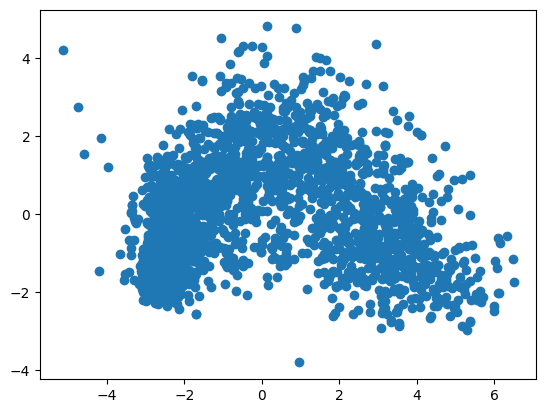

In [ ]:


X = data_cleaned_no_corr
data_cleaned_no_corr
# 2. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Application de PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print("Composantes principales : ")
print(pca.components_)



Z = pca.transform(X_scaled)
Z.shape
plt.scatter(Z[:,0], Z[:,1])


In [ ]:
# prompt: #AFFICHER LES VALEURS PROPRE DE PCA

variance_expliquee = np.cumsum(pca.explained_variance_ratio_)

# Définir un seuil de variance expliquée (ex. 80%)
seuil_variance = 0.80

# Trouver le nombre de composantes principales pour atteindre le seuil
nombre_composantes = np.argmax(variance_expliquee >= seuil_variance) + 1

print(f"Variance expliquée cumulée : {variance_expliquee}")
print(f"Nombre de composantes nécessaires pour atteindre {int(seuil_variance * 100)}% de variance : {nombre_composantes}")

# Optionnel : tracer la variance expliquée cumulée pour visualiser
import matplotlib.pyplot as plt

Variance expliquée cumulée : [0.27758464 0.36888402]
Nombre de composantes nécessaires pour atteindre 80% de variance : 1


[0.85108003 0.56784966 0.49318934 0.4519824  0.43258291 0.44249133
 0.40550091 0.38904702 0.37007823]


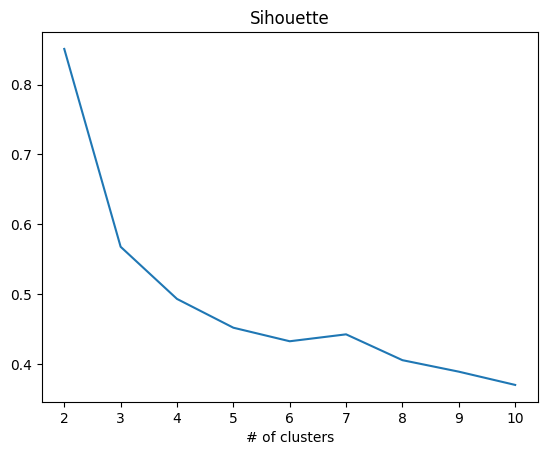

In [ ]:
#librairie pour évaluation des partitions
from sklearn import cluster
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res= np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(data_cleaned)
    res[k] = metrics.silhouette_score(data_cleaned,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [ ]:
# Application de l'algorithme KMeans
kmeans = KMeans(n_clusters=2)  # Choisissez le nombre de clusters souhaité
kmeans.fit(Z)

# Récupérer les labels des clusters
labels = kmeans.labels_

# Ajouter les labels au dataset original
data_cleaned['cluster'] = labels

# Afficher les résultats
data_cleaned


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,cluster
0,5524.0,1957.0,2.0,4.0,58138.0,0.0,0.0,80.0,58.0,635.0,...,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,1.0,0
1,2174.0,1954.0,2.0,4.0,46344.0,1.0,1.0,157.0,38.0,11.0,...,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,1
2,4141.0,1965.0,2.0,5.0,71613.0,0.0,0.0,444.0,26.0,426.0,...,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0
3,6182.0,1984.0,2.0,5.0,26646.0,1.0,0.0,199.0,26.0,11.0,...,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,1
4,5324.0,1981.0,4.0,3.0,58293.0,1.0,0.0,390.0,94.0,173.0,...,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,2.0,3.0,61223.0,0.0,1.0,272.0,46.0,709.0,...,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0
2236,4001.0,1946.0,4.0,5.0,64014.0,2.0,1.0,207.0,56.0,406.0,...,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,1
2237,7270.0,1981.0,2.0,2.0,56981.0,0.0,0.0,521.0,91.0,908.0,...,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,0.0,0
2238,8235.0,1956.0,3.0,5.0,69245.0,0.0,1.0,500.0,8.0,428.0,...,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0


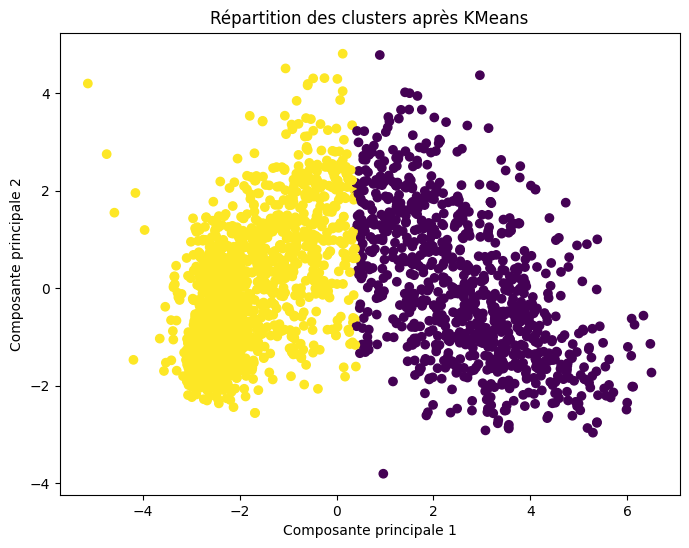

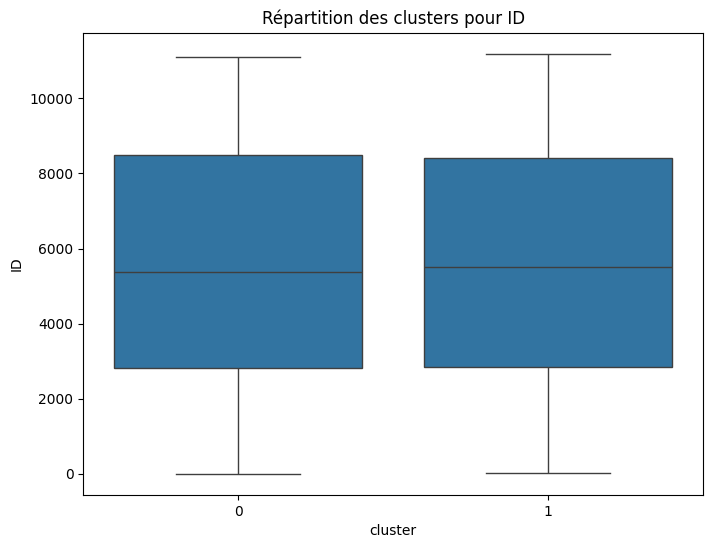

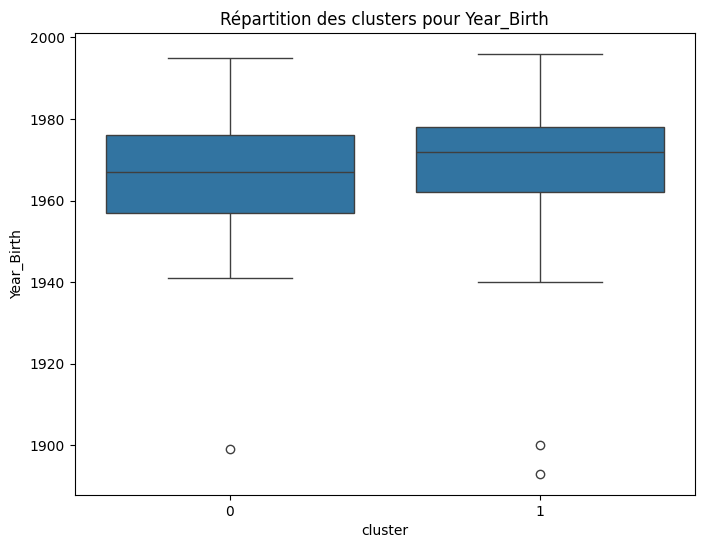

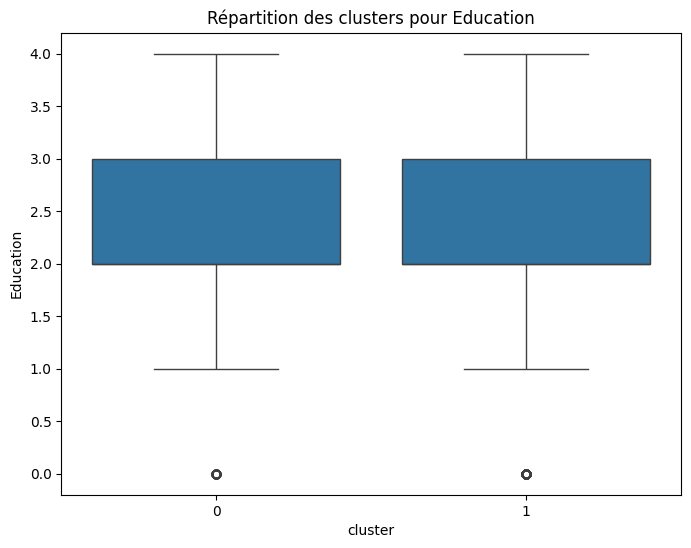

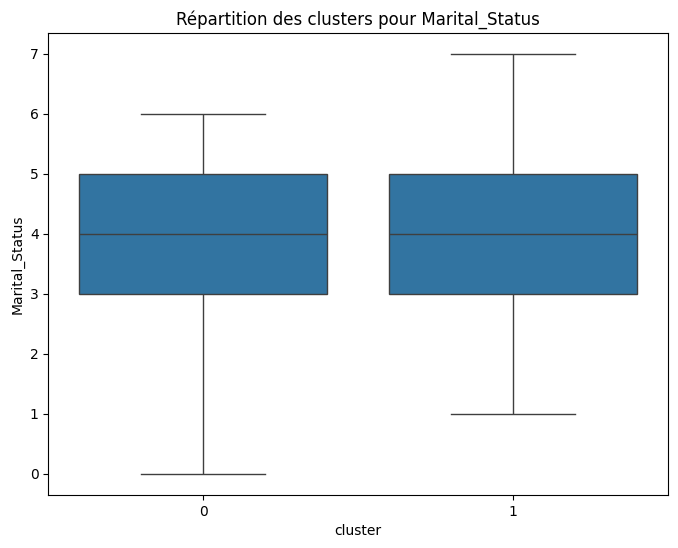

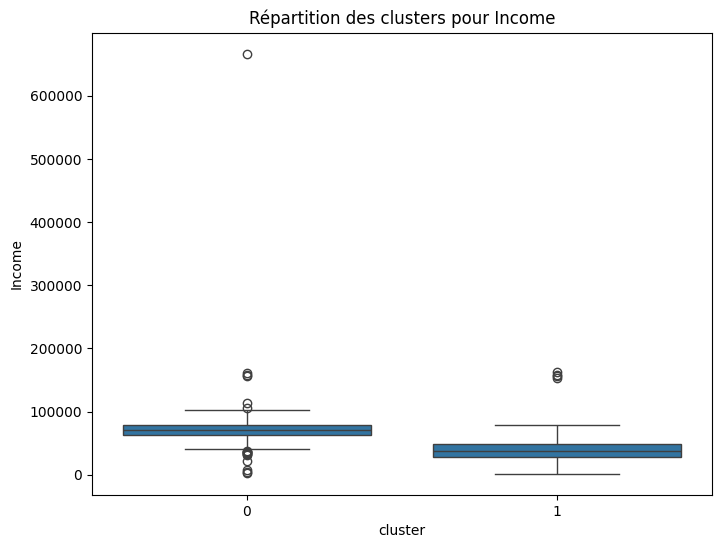

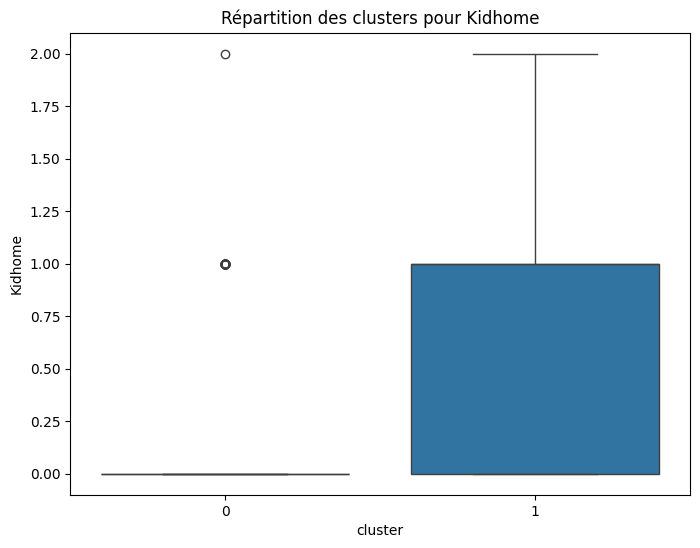

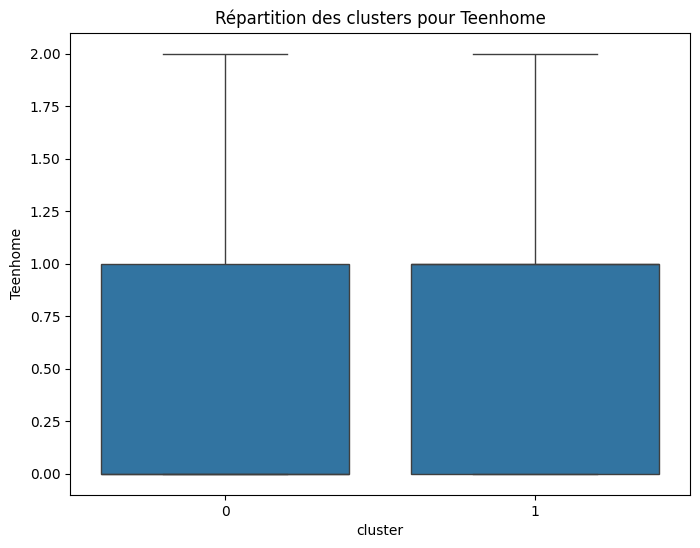

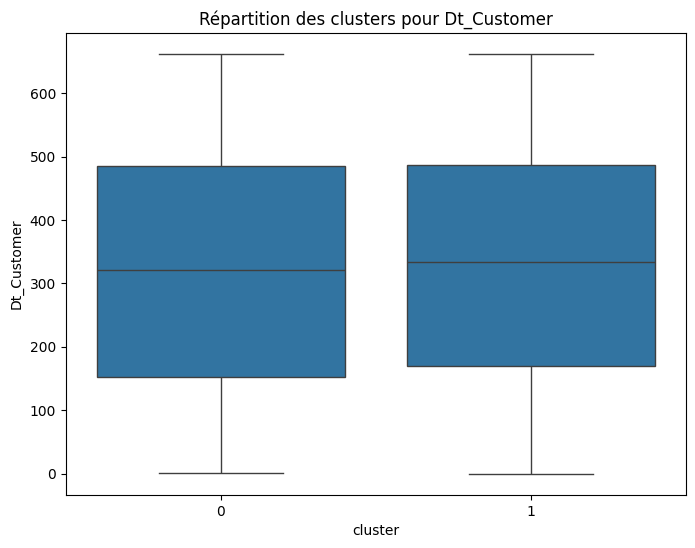

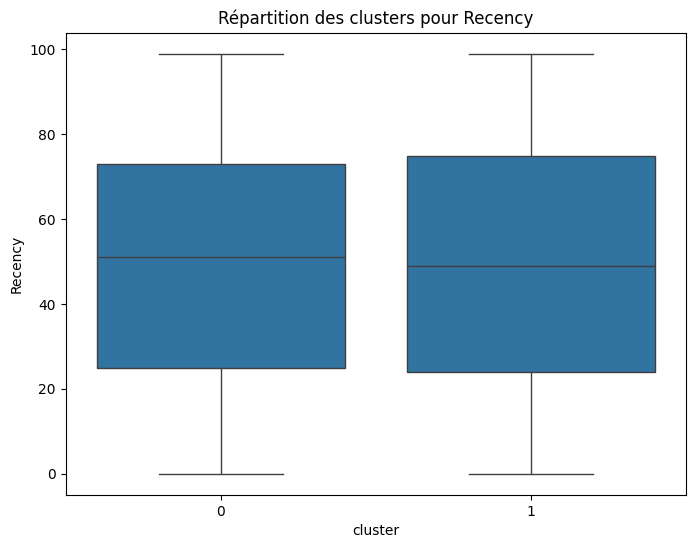

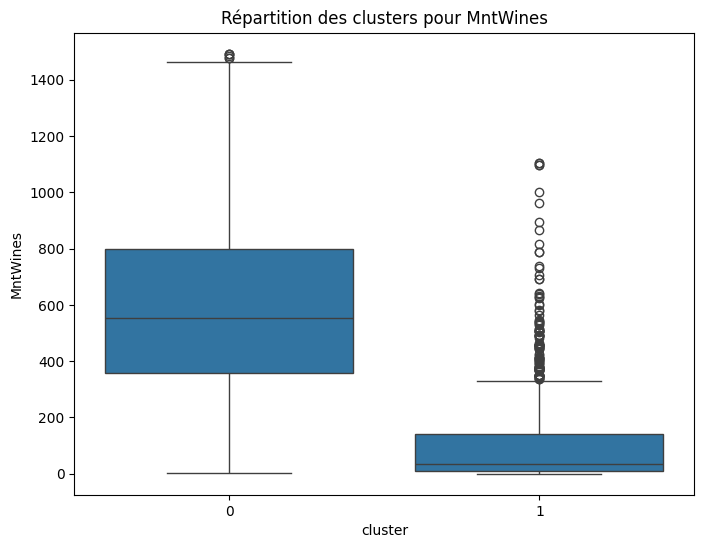

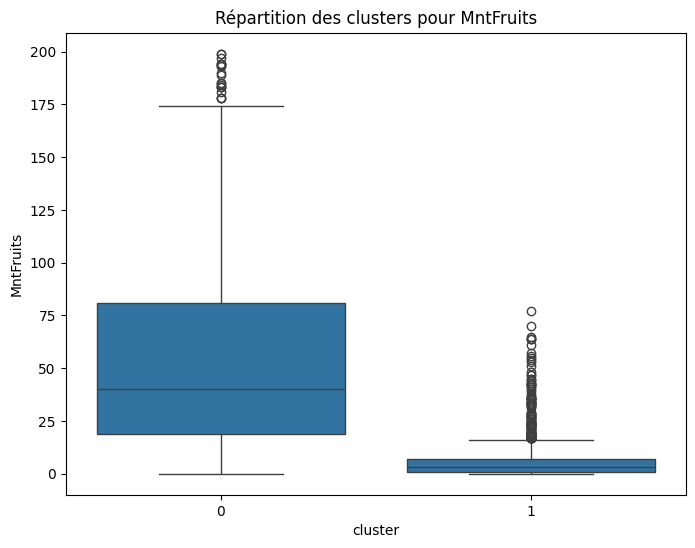

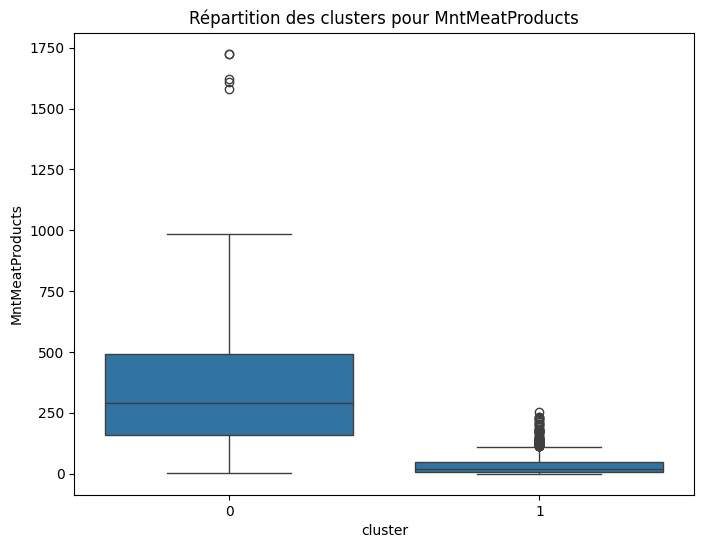

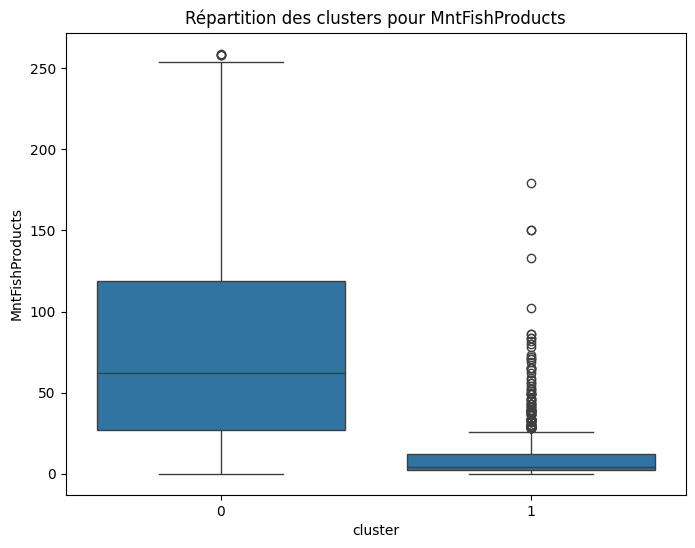

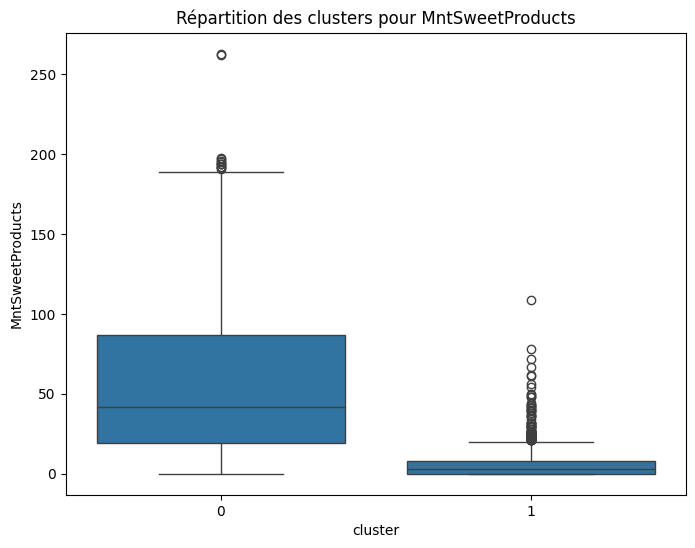

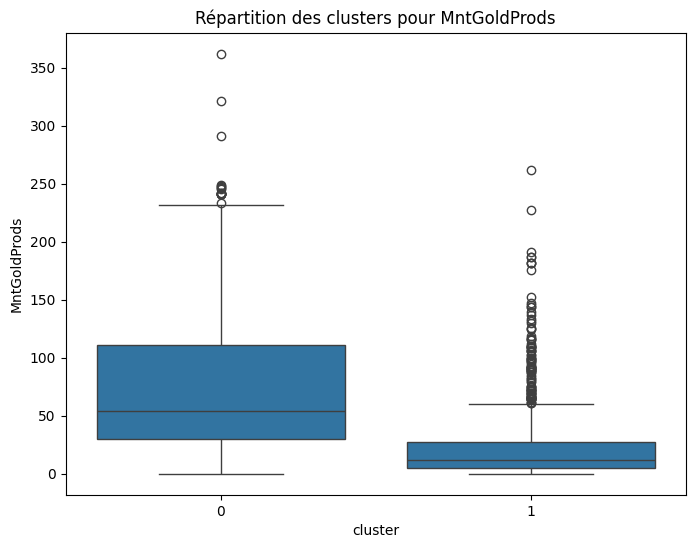

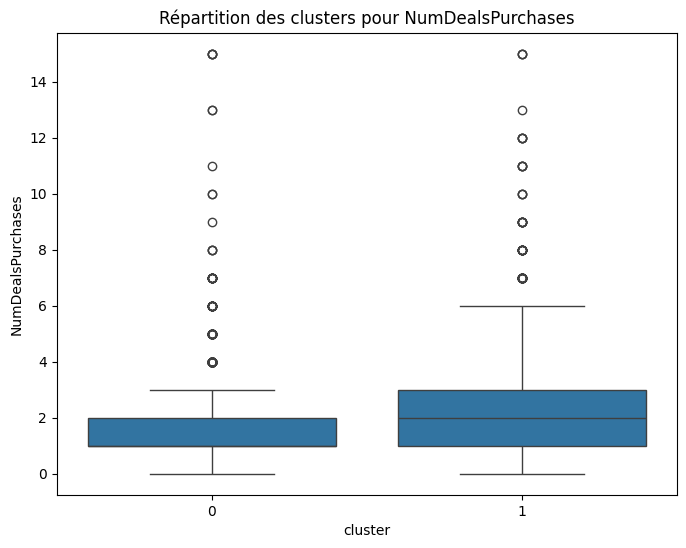

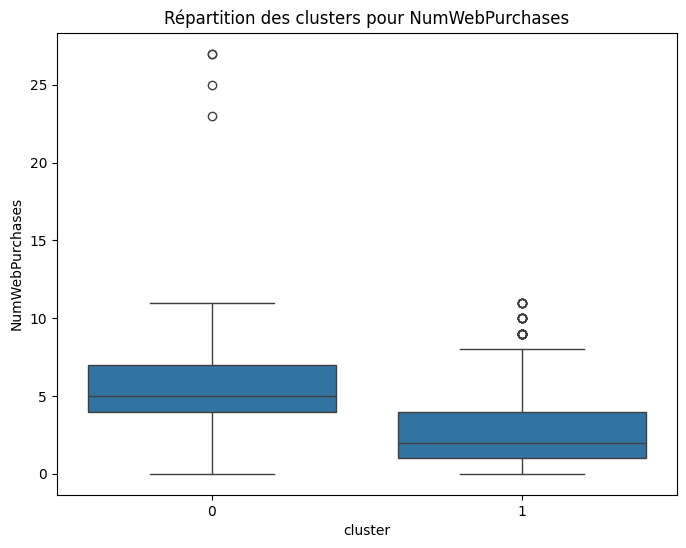

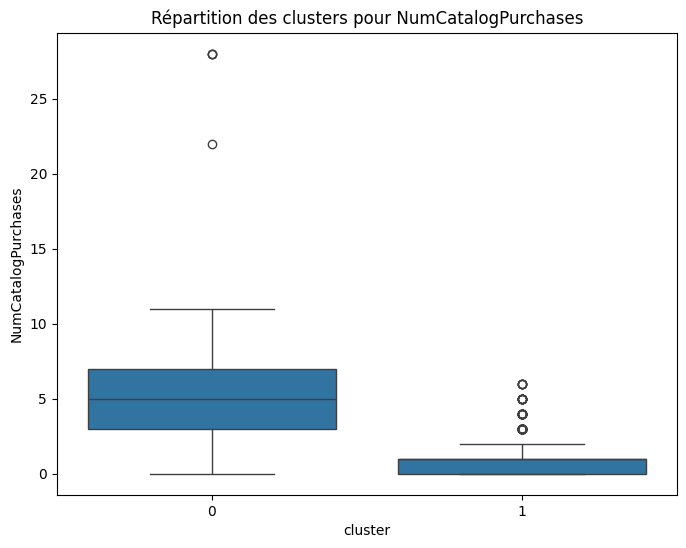

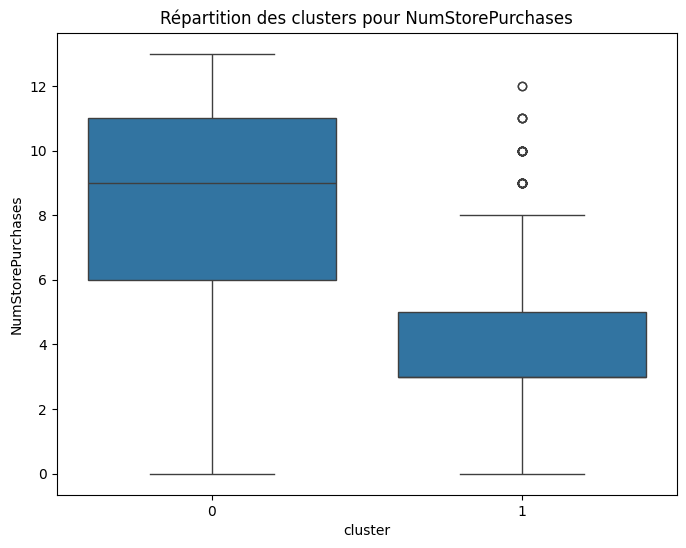

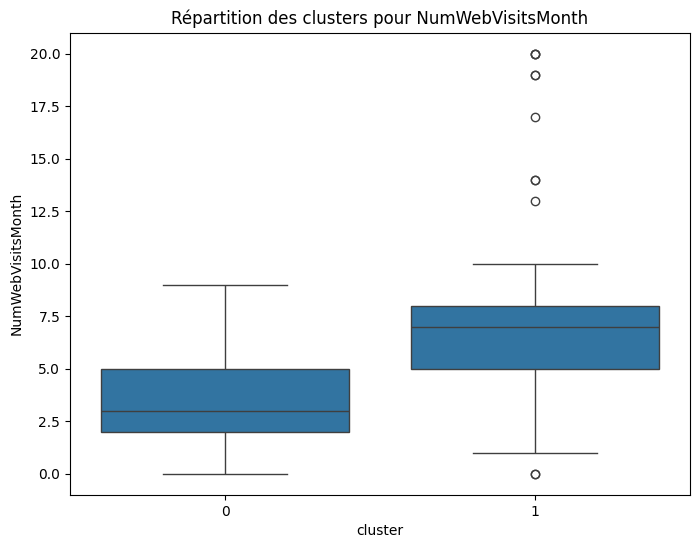

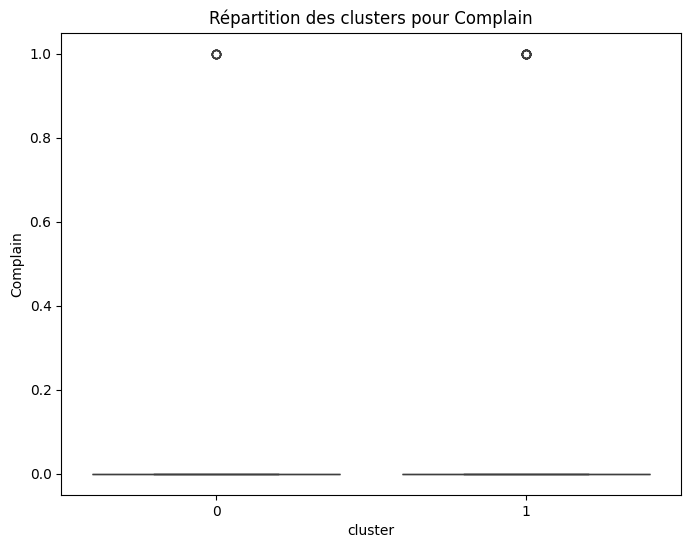

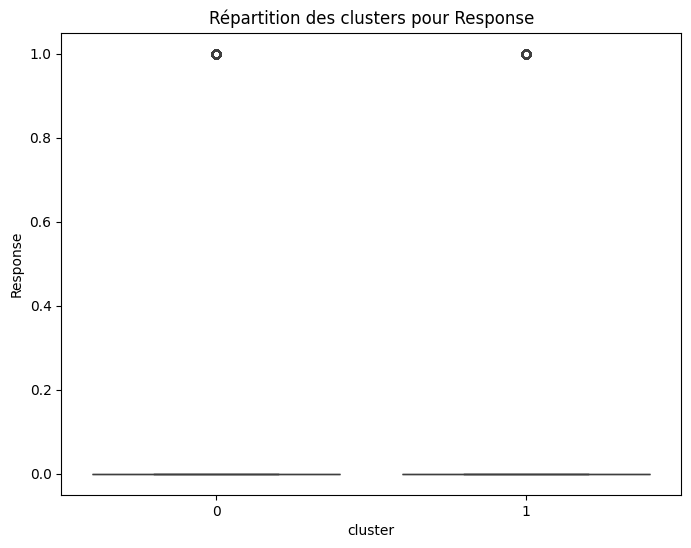

In [ ]:
# prompt: donner la repartition apres l application du modele kmeans dans des figure
X_pca=Z
# Visualiser la répartition des clusters dans l'espace PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Répartition des clusters après KMeans')
plt.show()

# Visualiser la répartition des clusters pour chaque variable
for col in data_cleaned.columns[:-1]:  # Ignorer la colonne 'cluster'
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='cluster', y=col, data=data_cleaned)
  plt.title(f"Répartition des clusters pour {col}")
  plt.show()



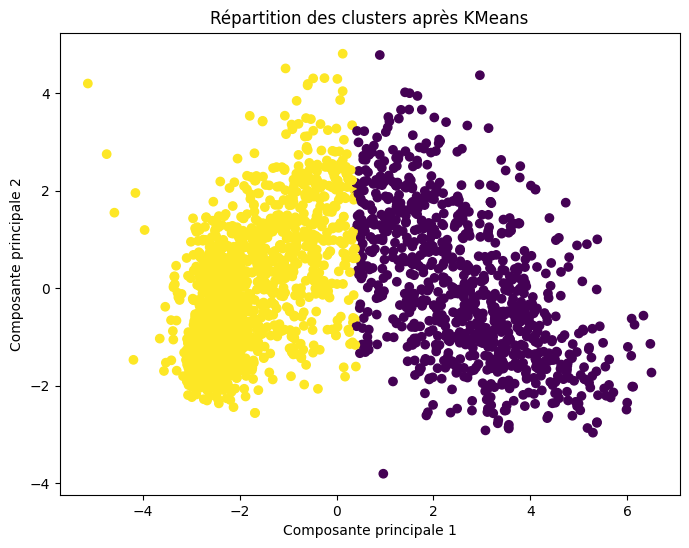


Caractéristiques du cluster 0:
  - ID: Moyenne = 5561.90, Ecart-type = 3226.68
  - Year_Birth: Moyenne = 1966.89, Ecart-type = 12.48
  - Education: Moyenne = 2.46, Ecart-type = 1.11
  - Marital_Status: Moyenne = 3.74, Ecart-type = 1.10
  - Income: Moyenne = 71673.63, Ecart-type = 23679.21
  - Kidhome: Moyenne = 0.06, Ecart-type = 0.25
  - Teenhome: Moyenne = 0.44, Ecart-type = 0.53
  - Dt_Customer: Moyenne = 321.54, Ecart-type = 192.59
  - Recency: Moyenne = 49.38, Ecart-type = 28.91
  - MntWines: Moyenne = 594.16, Ecart-type = 316.24
  - MntFruits: Moyenne = 55.27, Ecart-type = 48.06
  - MntMeatProducts: Moyenne = 355.83, Ecart-type = 248.44
  - MntFishProducts: Moyenne = 78.33, Ecart-type = 64.40
  - MntSweetProducts: Moyenne = 57.22, Ecart-type = 49.96
  - MntGoldProds: Moyenne = 75.66, Ecart-type = 61.34
  - NumDealsPurchases: Moyenne = 1.99, Ecart-type = 1.84
  - NumWebPurchases: Moyenne = 5.77, Ecart-type = 2.72
  - NumCatalogPurchases: Moyenne = 5.26, Ecart-type = 2.81
  - NumS

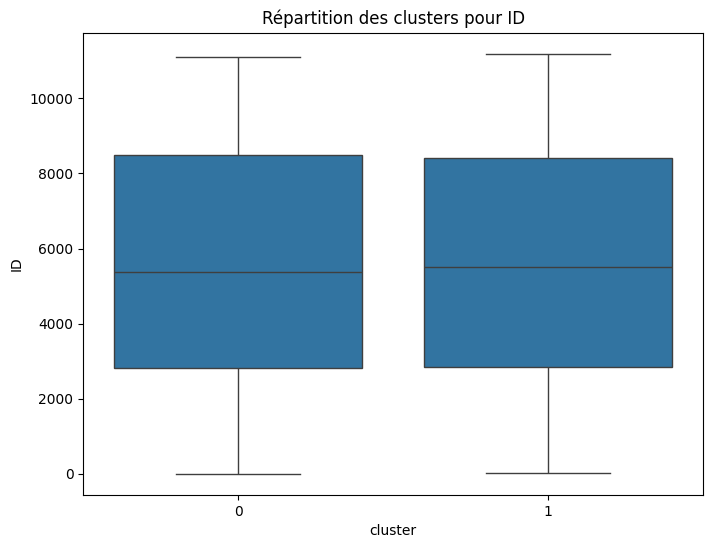

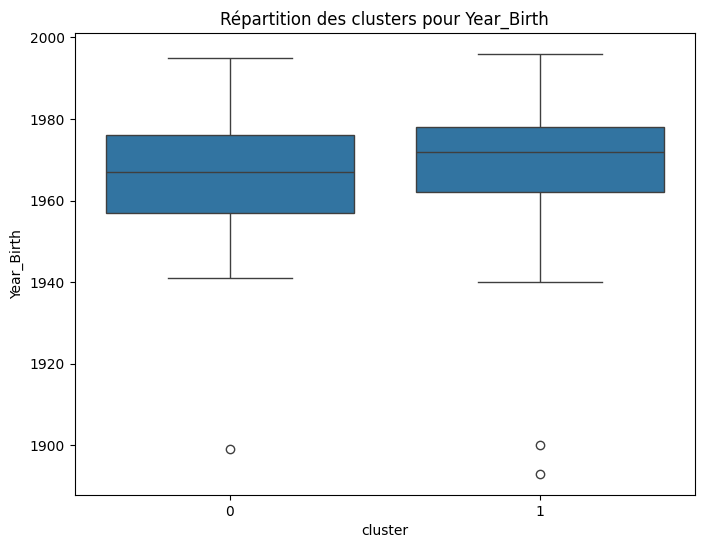

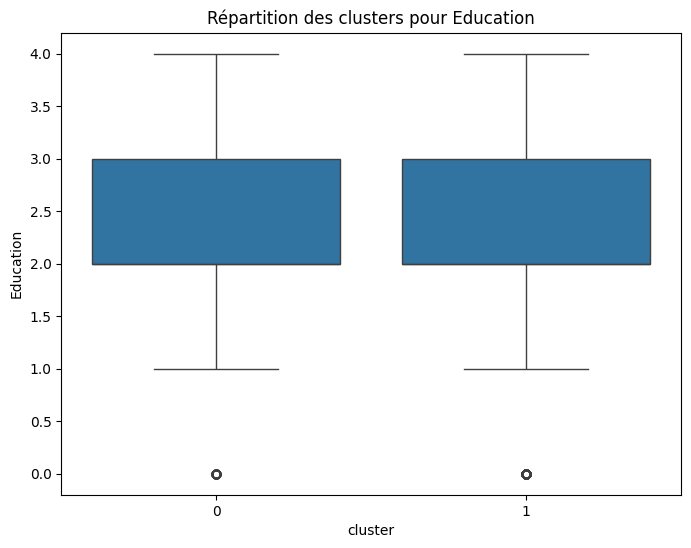

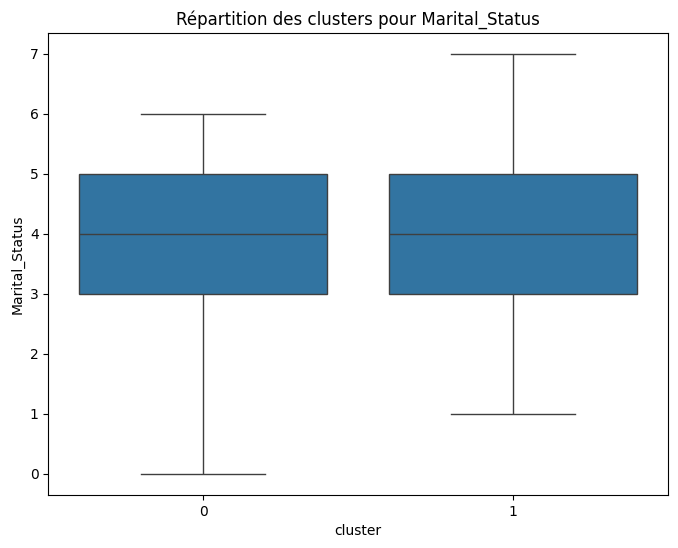

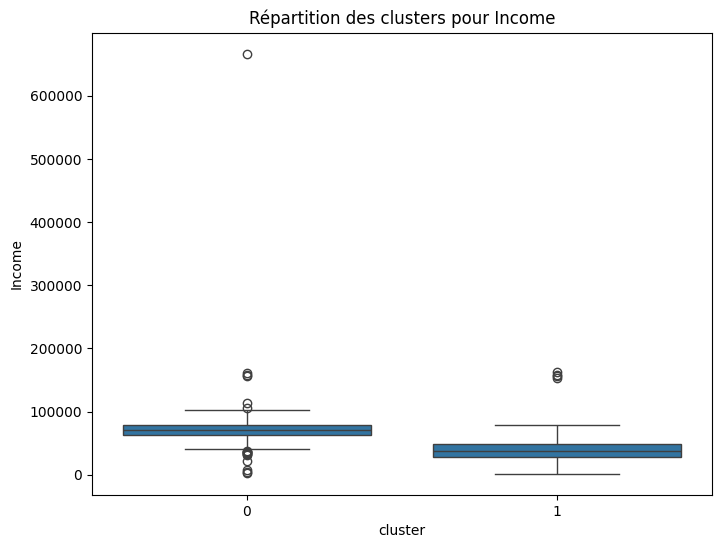

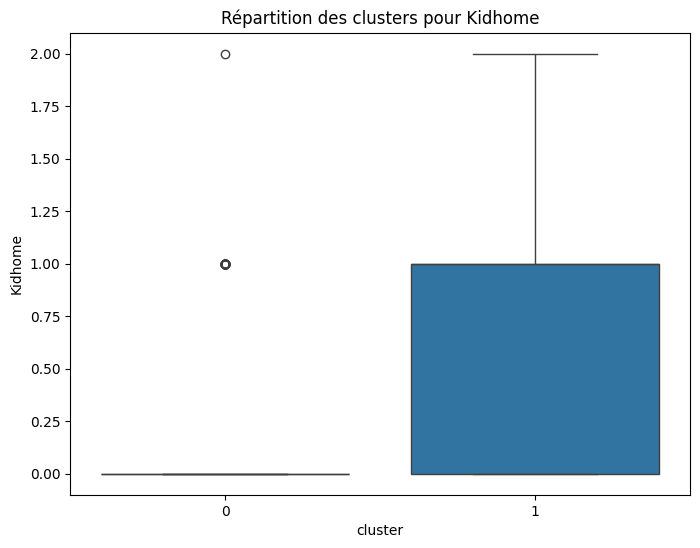

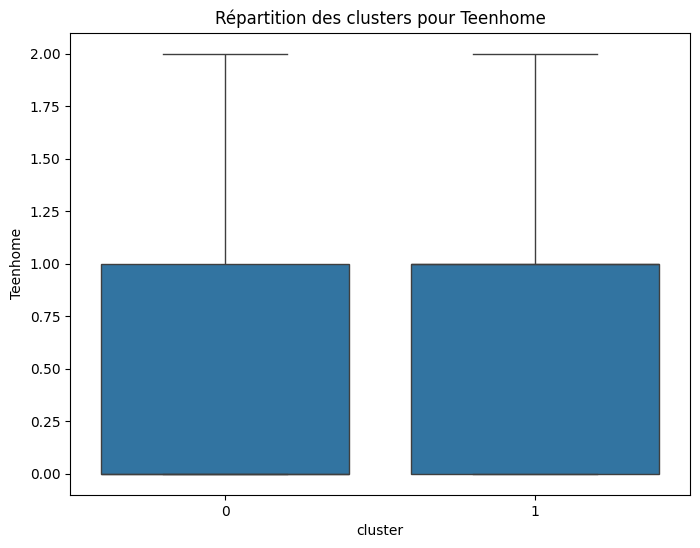

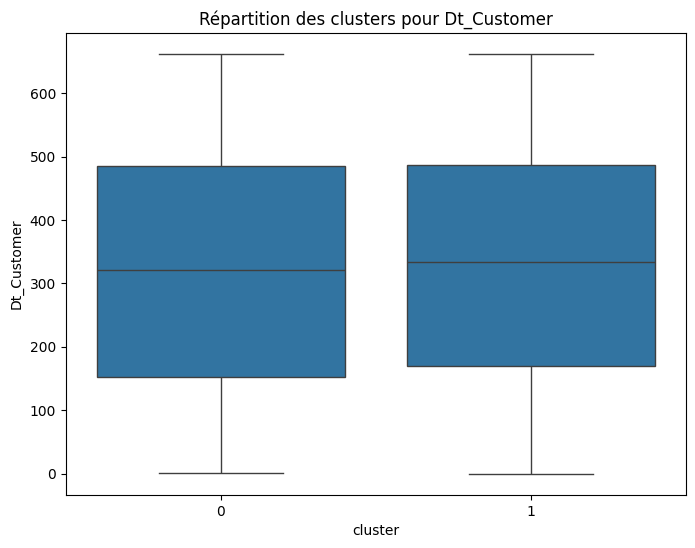

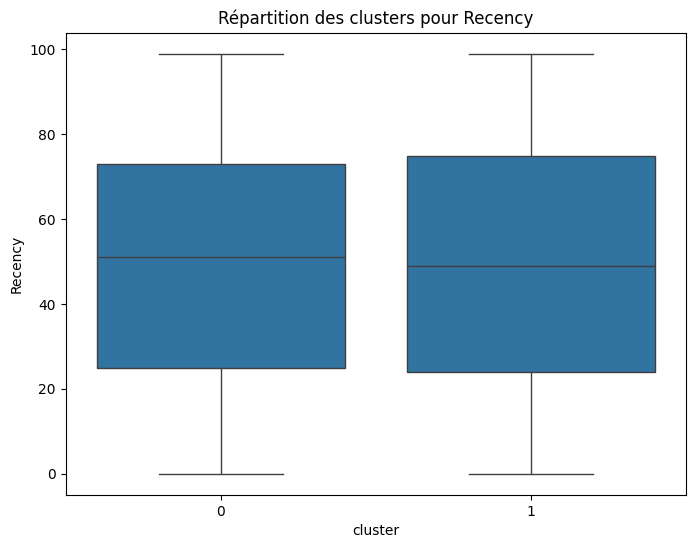

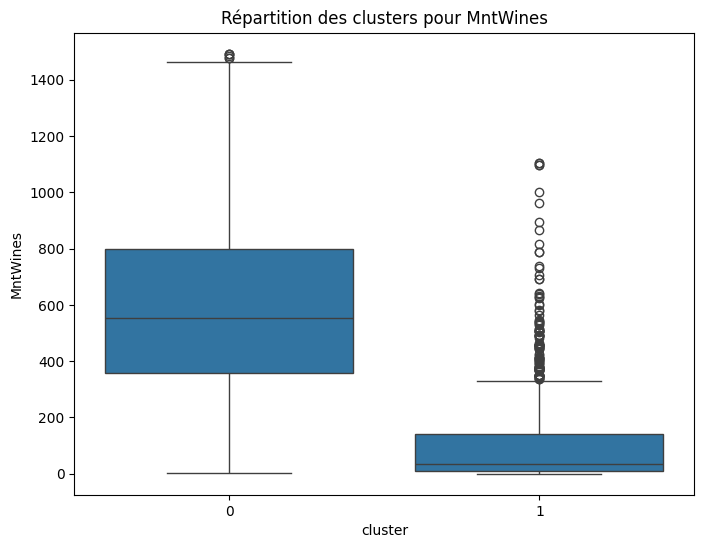

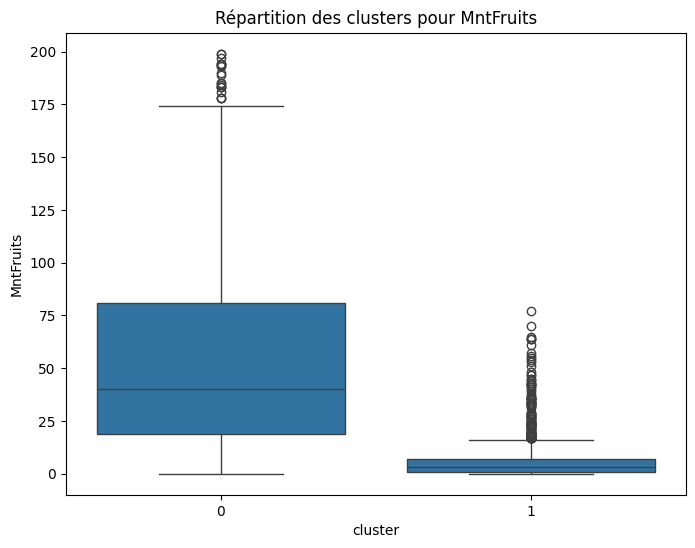

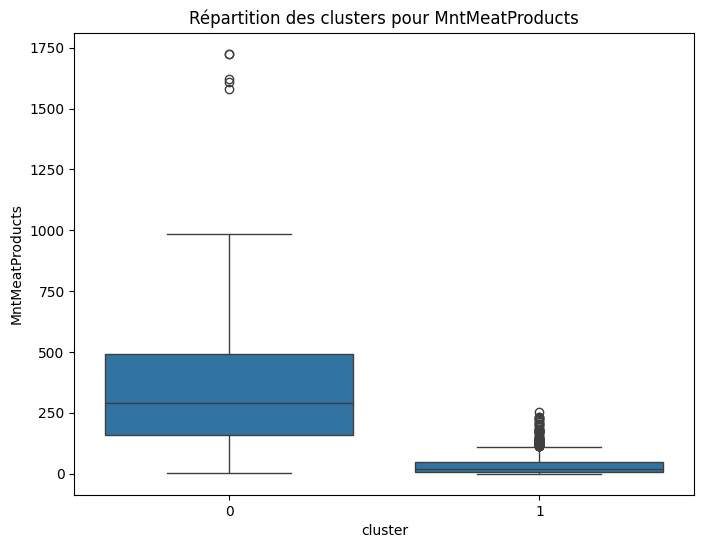

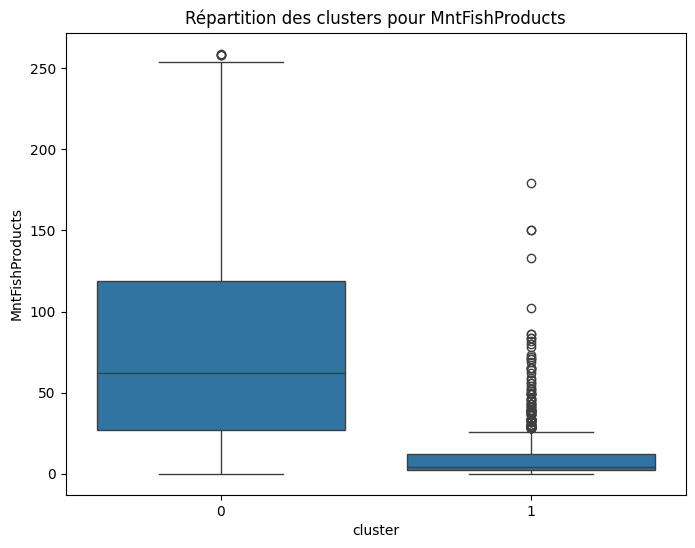

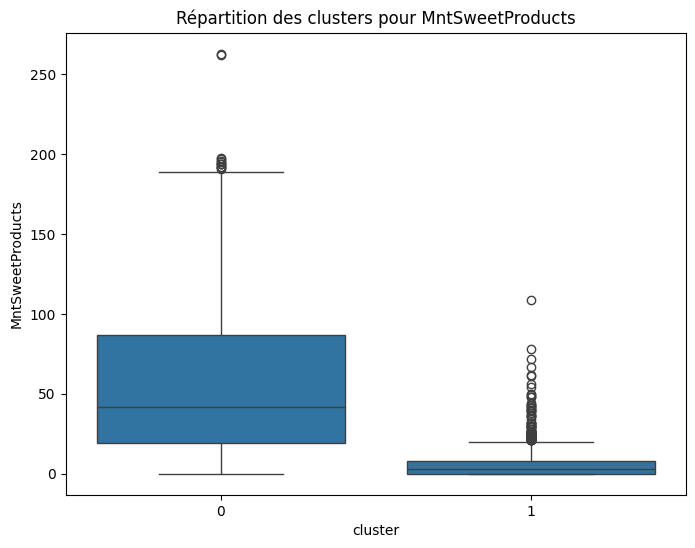

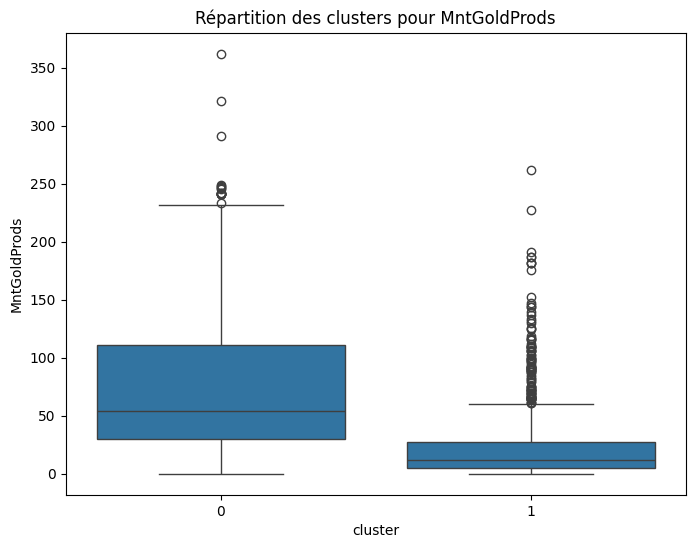

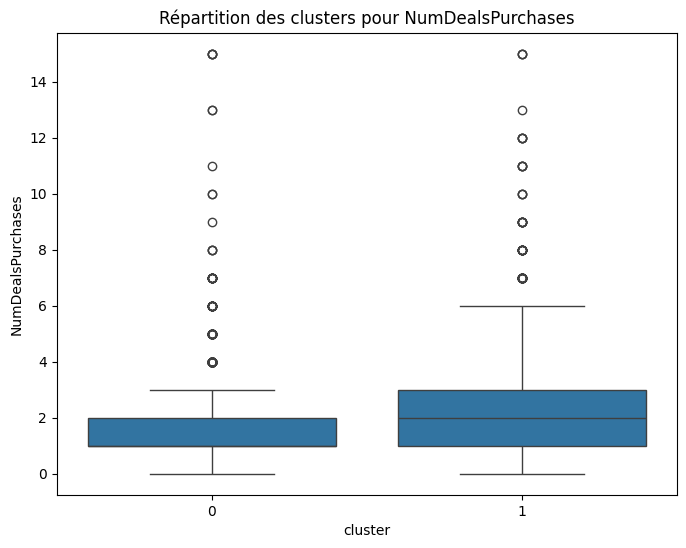

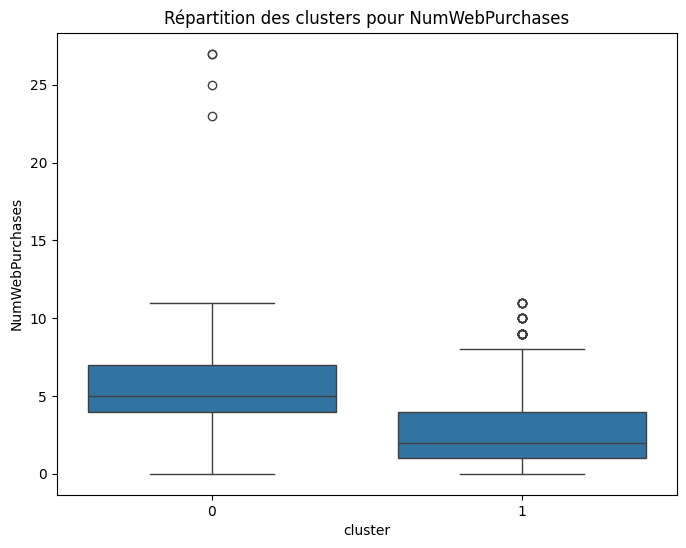

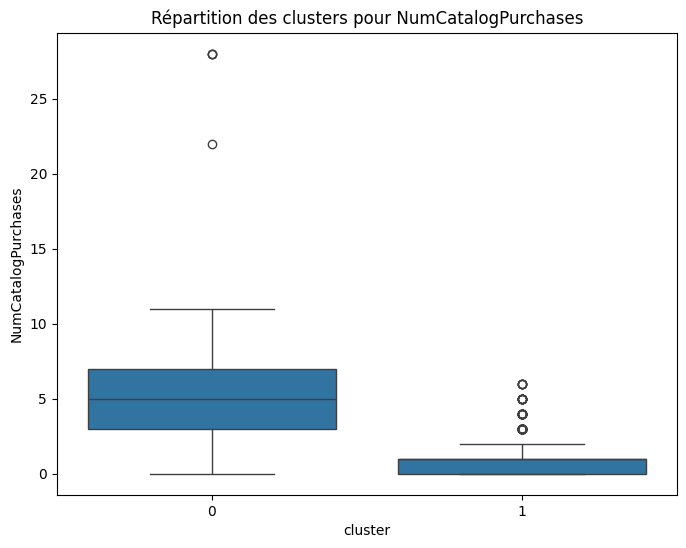

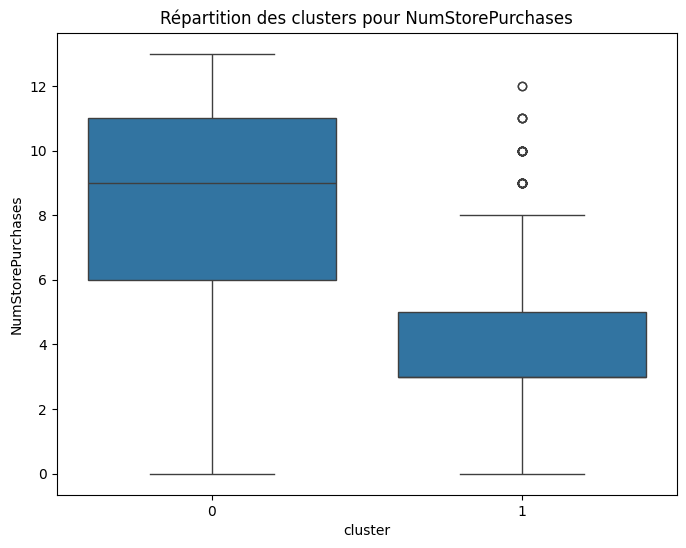

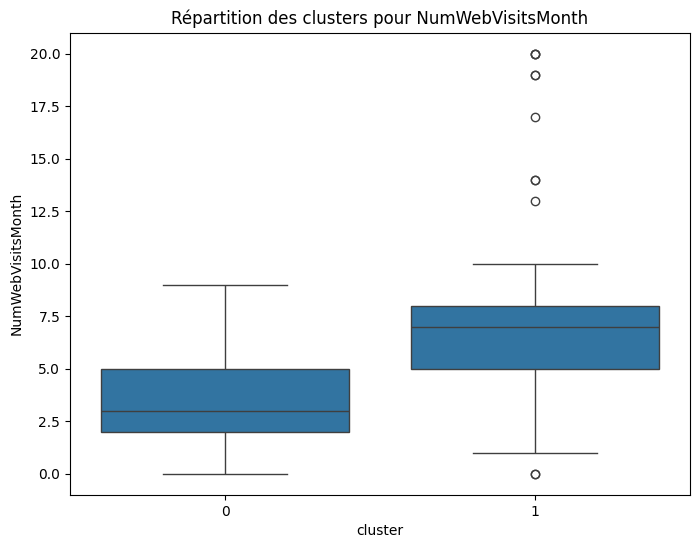

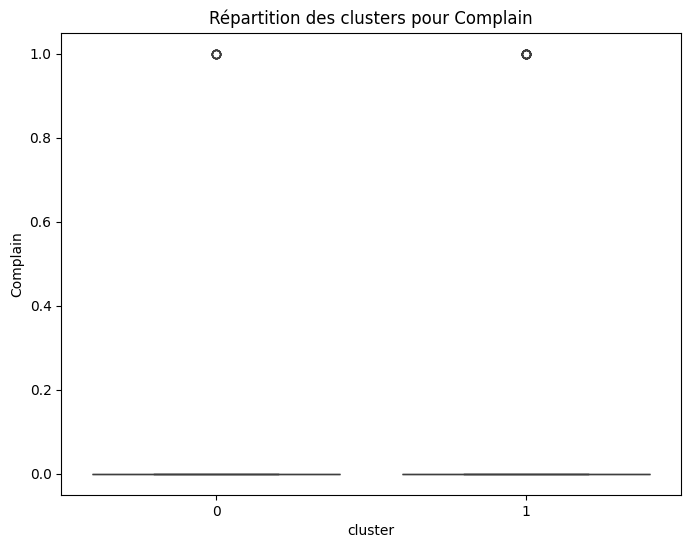

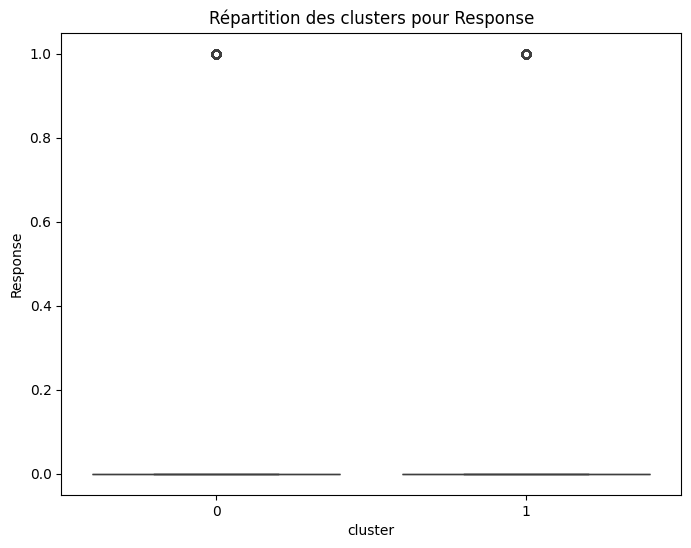

In [ ]:
# prompt: #montrer les resultats de k means de facon plus adequate et plus claire*


# Visualiser la répartition des clusters dans l'espace PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Répartition des clusters après KMeans')
plt.show()

# Analyser les caractéristiques des clusters
for i in range(kmeans.n_clusters):
  print(f"\nCaractéristiques du cluster {i}:")
  cluster_data = data_cleaned[data_cleaned['cluster'] == i]
  for col in data_cleaned.columns[:-1]:  # Ignorer la colonne 'cluster'
    print(f"  - {col}: Moyenne = {cluster_data[col].mean():.2f}, Ecart-type = {cluster_data[col].std():.2f}")

# Visualiser la répartition des clusters pour chaque variable
for col in data_cleaned.columns[:-1]:  # Ignorer la colonne 'cluster'
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='cluster', y=col, data=data_cleaned)
  plt.title(f"Répartition des clusters pour {col}")
  plt.show()



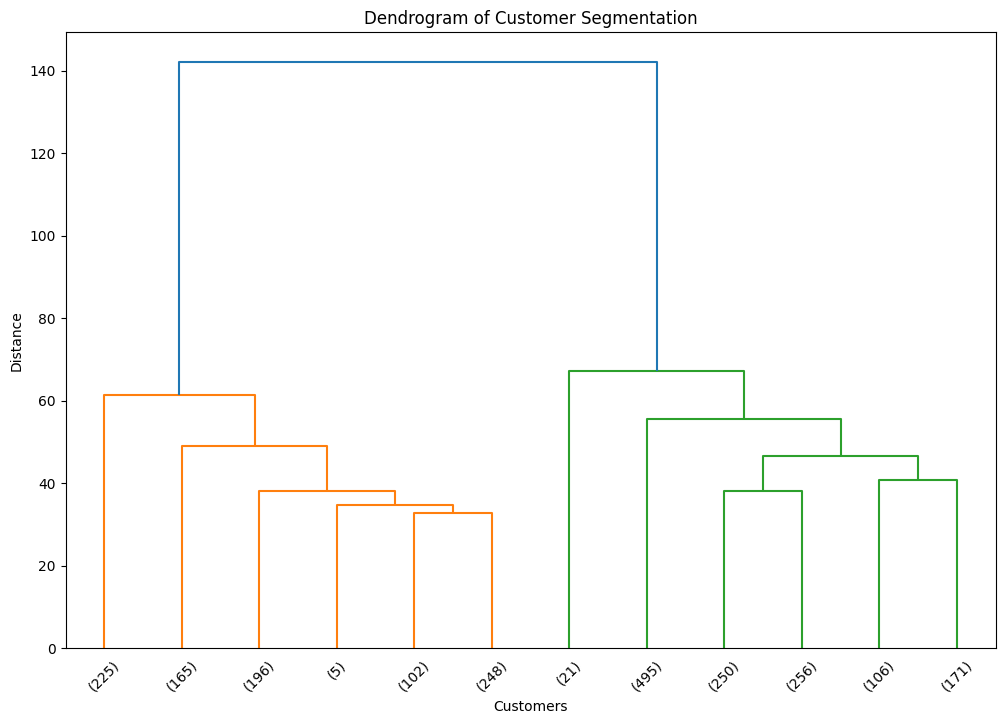

In [ ]:

from scipy.cluster.hierarchy import linkage, dendrogram


# Apply CAH (Hierarchical Clustering)
# Use Ward's method (minimizes variance within clusters)
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)  # Adjust p as needed
plt.title("Dendrogram of Customer Segmentation")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [ ]:
# prompt: decoupage en 2 groupes obtenu au cell precedente avec t=7

# Example usage (replace with your actual labels)
# Assuming labels are in a NumPy array
labels = np.array(data_cleaned['cluster'])

# Set the threshold for the dendrogram
t = 7  # Example threshold, adjust as needed

# Find the clusters based on the threshold
cluster_groups = {}
for i, label in enumerate(labels):
    if label not in cluster_groups:
        cluster_groups[label] = []
    cluster_groups[label].append(i)



# Now you can further analyze each group
# Example: Printing the indices of the first two clusters
if len(cluster_groups) >=2:
  group1 = cluster_groups[0]
  group2 = cluster_groups[1]
  print(f"\nGroup 1 (Cluster 0): {group1}")
  print(f"Group 2 (Cluster 1): {group2}")
else:
  print("\n Not enough clusters to perform the split")


Group 1 (Cluster 0): [0, 2, 5, 6, 12, 15, 18, 21, 23, 27, 29, 34, 36, 39, 40, 45, 49, 50, 51, 53, 55, 56, 60, 62, 64, 67, 68, 69, 70, 72, 76, 77, 84, 88, 92, 98, 99, 102, 103, 104, 107, 109, 110, 111, 113, 116, 117, 120, 124, 125, 126, 129, 130, 132, 133, 135, 140, 141, 142, 143, 154, 155, 159, 161, 163, 164, 166, 168, 175, 176, 179, 182, 187, 188, 191, 196, 197, 198, 201, 202, 203, 209, 211, 214, 217, 219, 221, 222, 224, 227, 228, 231, 234, 237, 240, 241, 243, 244, 246, 247, 248, 249, 252, 254, 256, 261, 266, 268, 270, 275, 276, 277, 278, 279, 283, 286, 287, 288, 292, 295, 298, 299, 301, 305, 307, 312, 313, 320, 323, 325, 332, 335, 336, 338, 339, 340, 343, 345, 347, 350, 351, 352, 353, 354, 357, 358, 360, 365, 366, 368, 373, 378, 387, 389, 390, 392, 394, 395, 401, 411, 412, 414, 415, 417, 418, 423, 424, 426, 427, 429, 430, 432, 433, 436, 447, 449, 450, 451, 454, 456, 459, 460, 461, 463, 465, 466, 470, 472, 475, 484, 485, 486, 487, 490, 492, 494, 495, 497, 498, 499, 503, 505, 506, 507

Contingency Matrix:
 col_0    0     1
row_0           
0      917     0
1        0  1323

Adjusted Rand Index: 1.0

Adjusted Mutual Information: 1.0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0


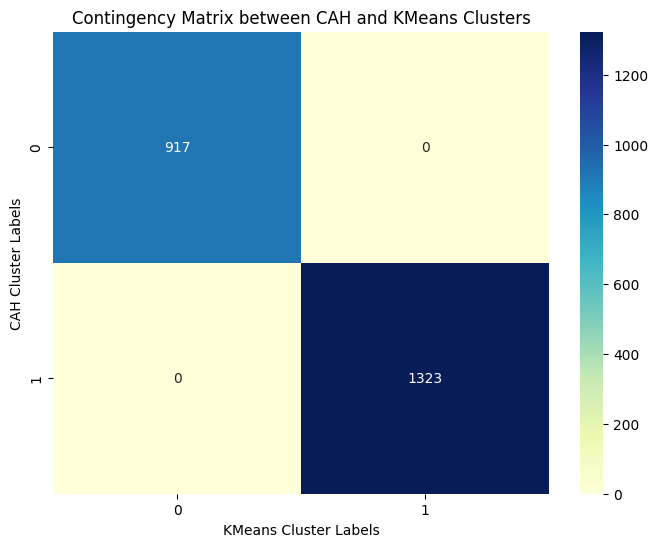

In [ ]:
# prompt: comparer les contenu de clusters obtenu par le cah et le k means

import numpy as np

# Assuming 'labels_cah' contains the cluster labels from CAH and 'labels' from KMeans
#  and they are numpy arrays of the same length

# Convert cluster labels to numpy arrays if they aren't already
labels_cah = np.array(labels) # Remplacer labels_cah par le nom de votre variable contenant les labels du CAH
labels = np.array(labels)

# Create a contingency matrix
contingency_matrix = pd.crosstab(labels_cah, labels)
print("Contingency Matrix:\n", contingency_matrix)

# Calculate the Rand Index
from sklearn.metrics import adjusted_rand_score

rand_index = adjusted_rand_score(labels_cah, labels)
print(f"\nAdjusted Rand Index: {rand_index}")


# Calculate other metrics (e.g. Adjusted Mutual Information, Homogeneity, Completeness, V-measure)
from sklearn.metrics.cluster import adjusted_mutual_info_score, homogeneity_completeness_v_measure

ami = adjusted_mutual_info_score(labels_cah, labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels_cah, labels)

print(f"\nAdjusted Mutual Information: {ami}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")


# Visualize the comparison (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Contingency Matrix between CAH and KMeans Clusters")
plt.xlabel("KMeans Cluster Labels")
plt.ylabel("CAH Cluster Labels")
plt.show()